In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Use Panoptic stylesheet - replace with where you saved it on your local directory
plt.style.use('[YOUR_DIRECTORY_HERE/]panoptic-dark-16_9.mplstyle')

In [216]:
dir = '[YOUR_DIRECTORY_HERE/]'

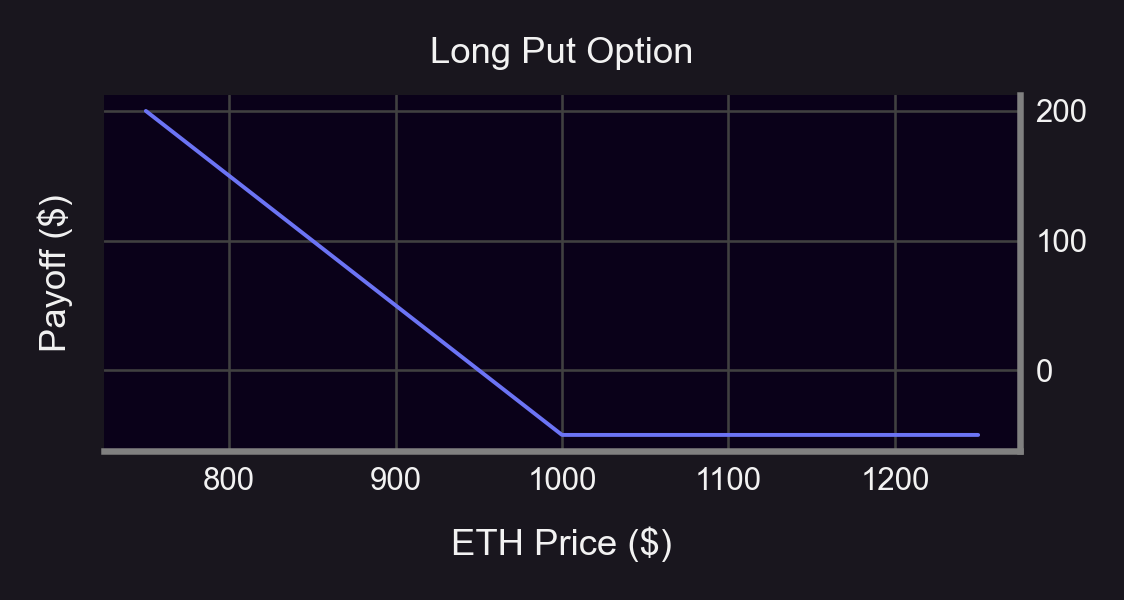

In [217]:
def put(S: np.ndarray, X: float, P: float) -> np.ndarray:
    """
    Calcaultes payoff for a call option

    :S Spot price
    :X Strike price
    :P Price (premium) of buying option
    """

    return np.where(S < X, X - S, 0) - P

# Put option
S_0 = 1_000
X = S_0
P = 50

S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)
payoff_put = put(S, X, P)

# Plot
plt.plot(S, payoff_put, label='Long Put')
plt.xlabel('ETH Price ($)')
plt.ylabel('Payoff ($)')
plt.title('Long Put Option')
plt.savefig(f"{dir}Put")

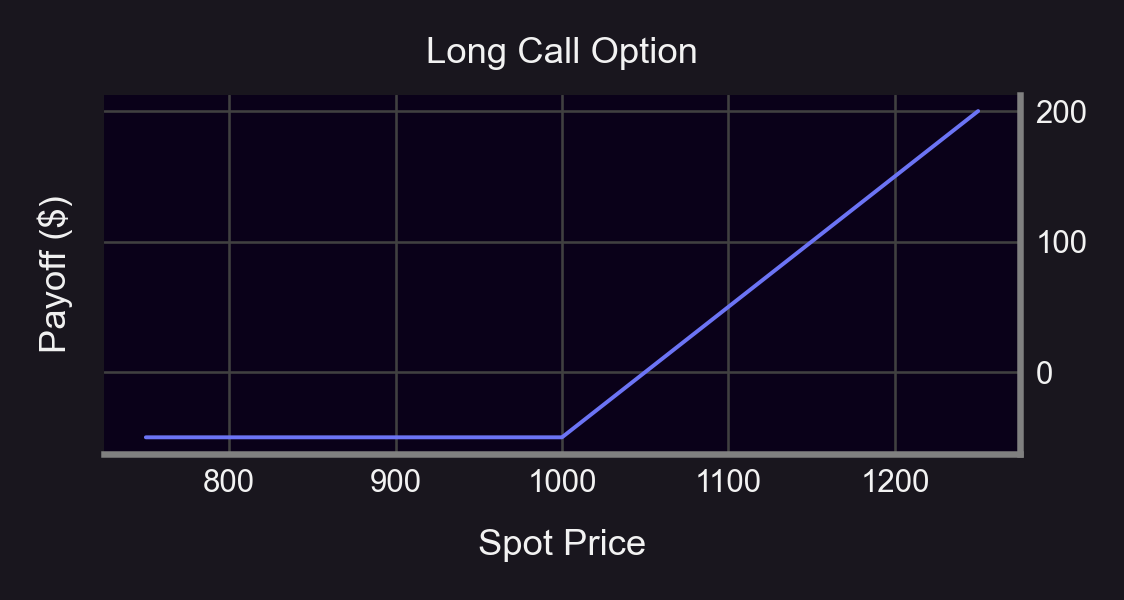

In [218]:
def call(S: np.ndarray, X: float, P: float) -> np.ndarray:
    """
    Calcaultes payoff for a call option

    :S Spot price
    :X Strike price
    :P Price (premium) of buying option
    """

    return np.where(S > X, S - X, 0) - P

# Call option
S_0 = 1_000
X = S_0
P = 50

S = np.linspace(.75 * S_0, S_0 * 1.25, 1_000)
payoff_call = call(S, X, P)

# Plot
plt.plot(S, payoff_call, label='Long Call')
plt.xlabel('Spot Price')
plt.ylabel('Payoff ($)')
plt.title('Long Call Option')
plt.savefig(f"{dir}Call")

In [226]:
def plot_payoffs(S: np.ndarray, title: str, payoffs: dict[str, np.ndarray]) -> None:
    plt.figure(dpi=750)
    for name, payoff in payoffs.items():
        plt.plot(S, payoff, linestyle='--', dashes=(2, 2), label=name)
        
    comb = sum(payoffs.values())
    plt.plot(S, comb, label=title)
    plt.xlabel('Spot Price')
    plt.ylabel('Payoff ($)')
    plt.legend()
    plt.title(title)
    plt.savefig(f"{dir}{title}")

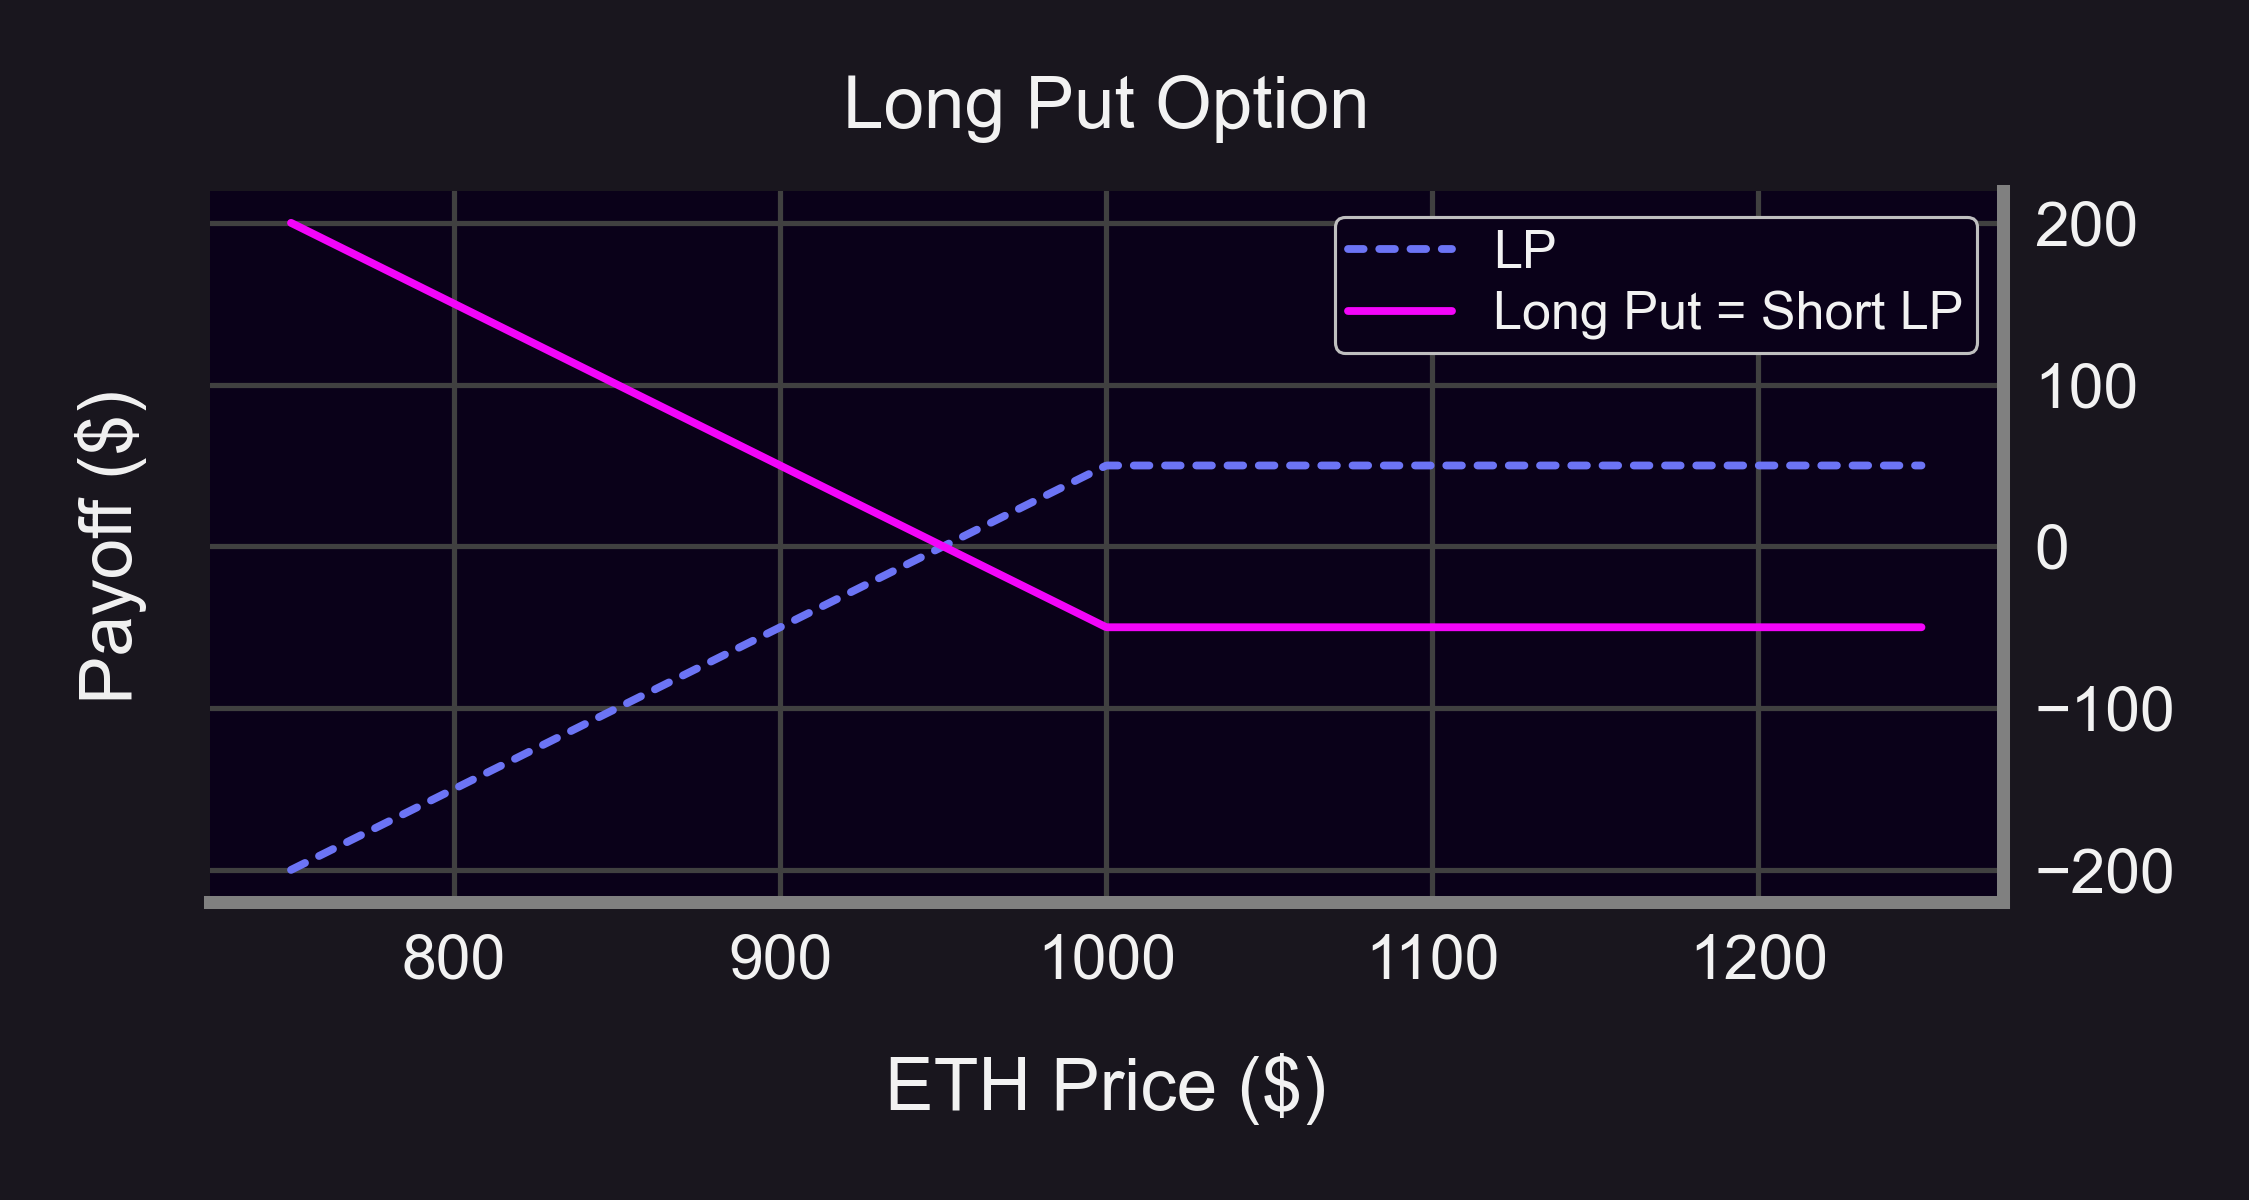

In [225]:
# Put option
S_0 = 1_000
X = S_0
P = 50

S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)
payoff_put = put(S, X, P)
payoff_LP = -payoff_put

# Plot
plt.figure(dpi=750)
plt.plot(S, payoff_LP, linestyle='--', dashes=(2, 2), label='LP')
plt.plot(S, payoff_put, label='Long Put = Short LP', color='#f305f9')
plt.legend()
plt.xlabel('ETH Price ($)')
plt.ylabel('Payoff ($)')
plt.title('Long Put Option')
plt.savefig(f"{dir}Put_2")

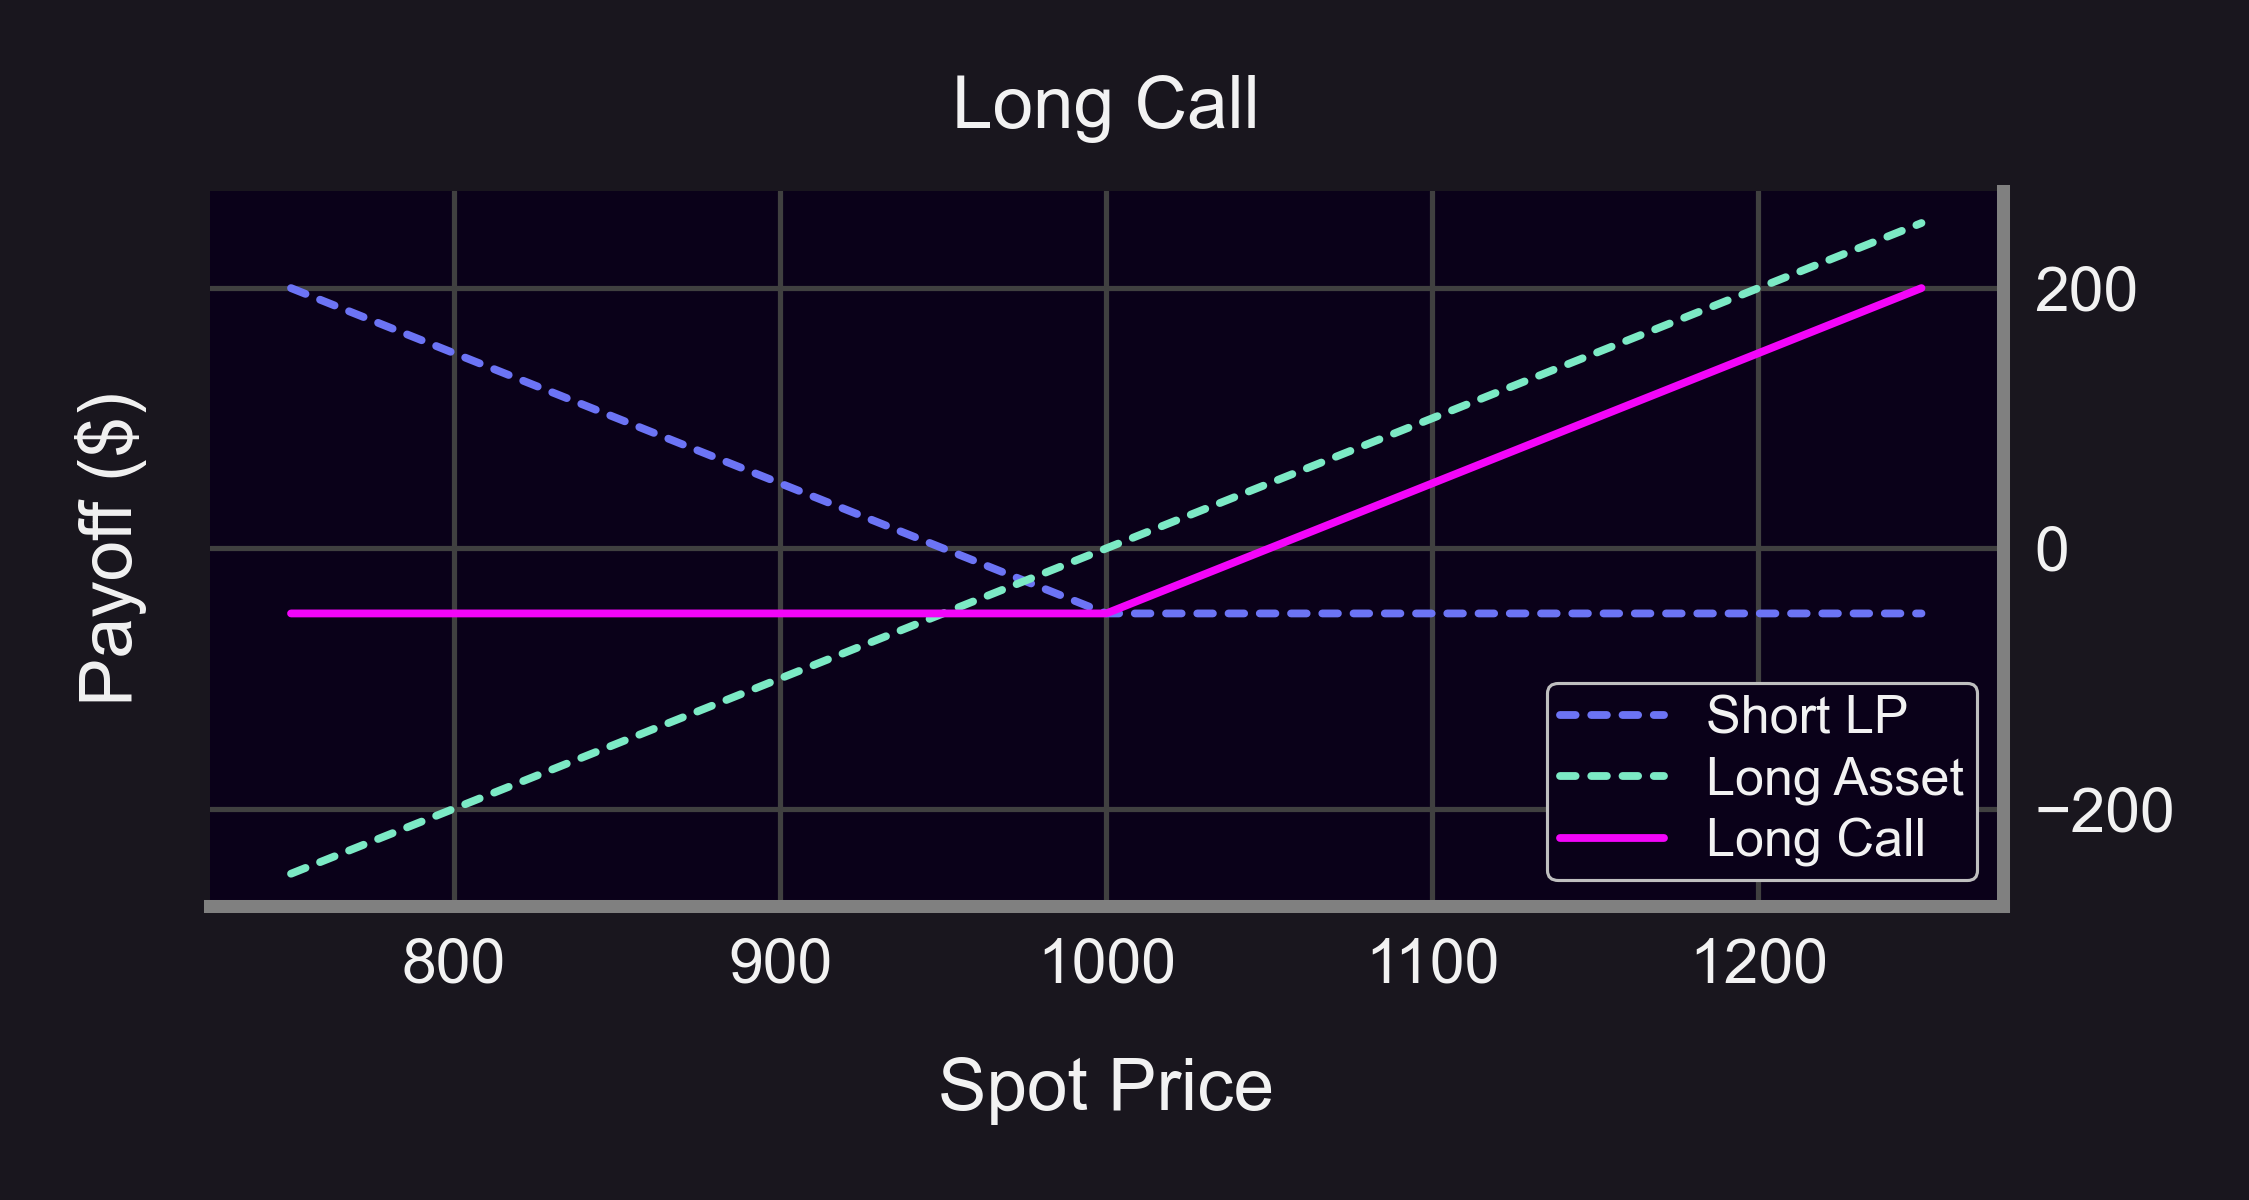

In [227]:
def long_asset(S: list, S_0: float) -> float:
    payoff = S - S_0
    return payoff

# Call option
S_0 = 1_000
X = S_0
P = 50

S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)
payoff_put = put(S, X, P)

long = long_asset(S, S_0)

# Plot
plot_payoffs(S, 'Long Call', {'Short LP': payoff_put, 'Long Asset': long})

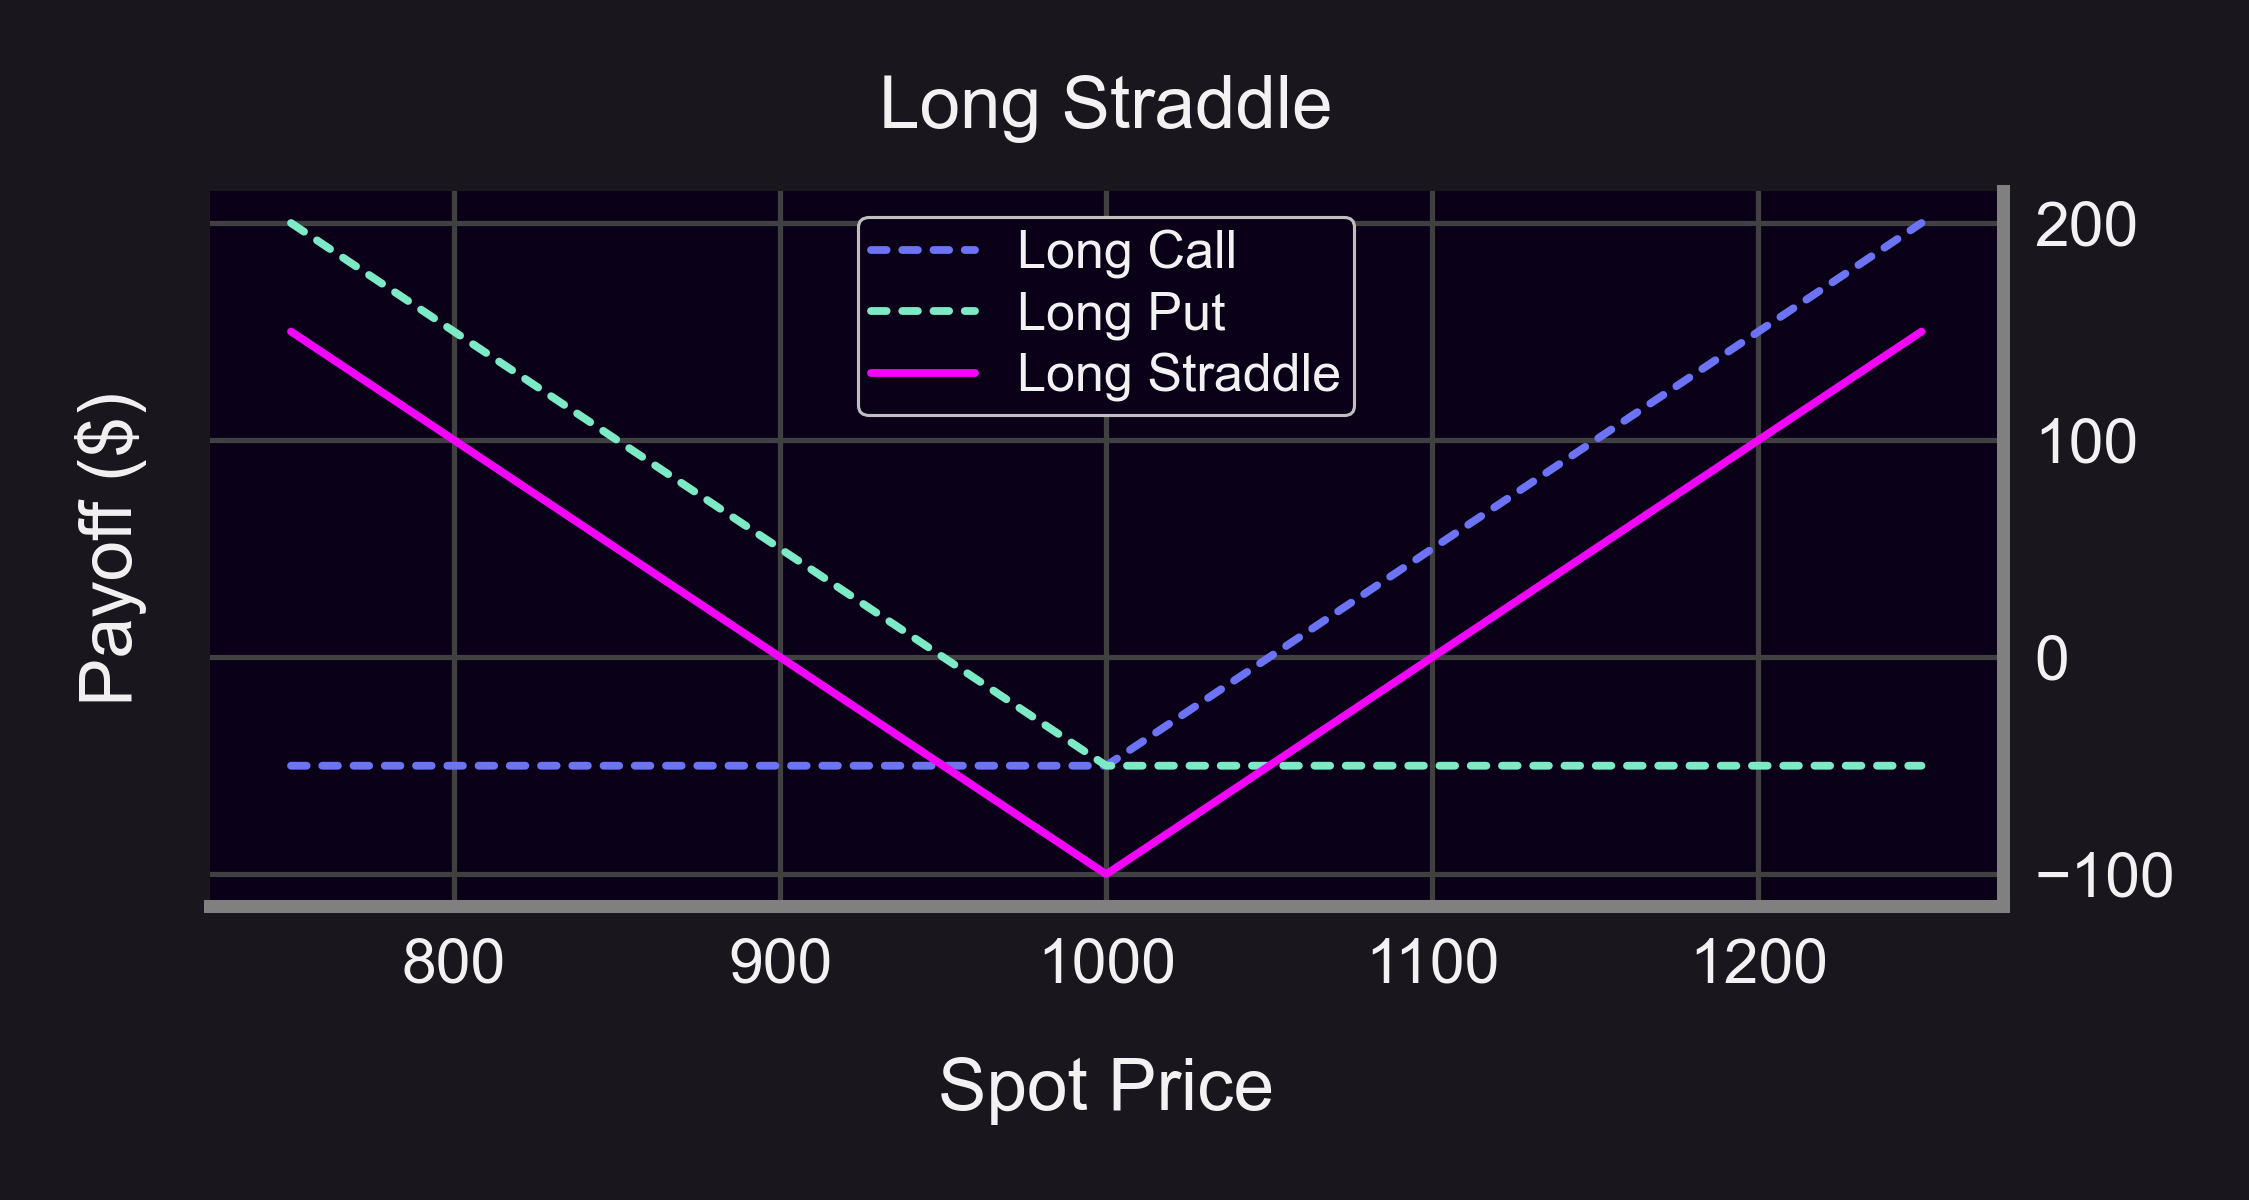

In [228]:
# Straddle = Call + Put (same strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Call option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_put = put(S, X, P)

plot_payoffs(S, 'Long Straddle', {'Long Call': payoff_call, 'Long Put': payoff_put})

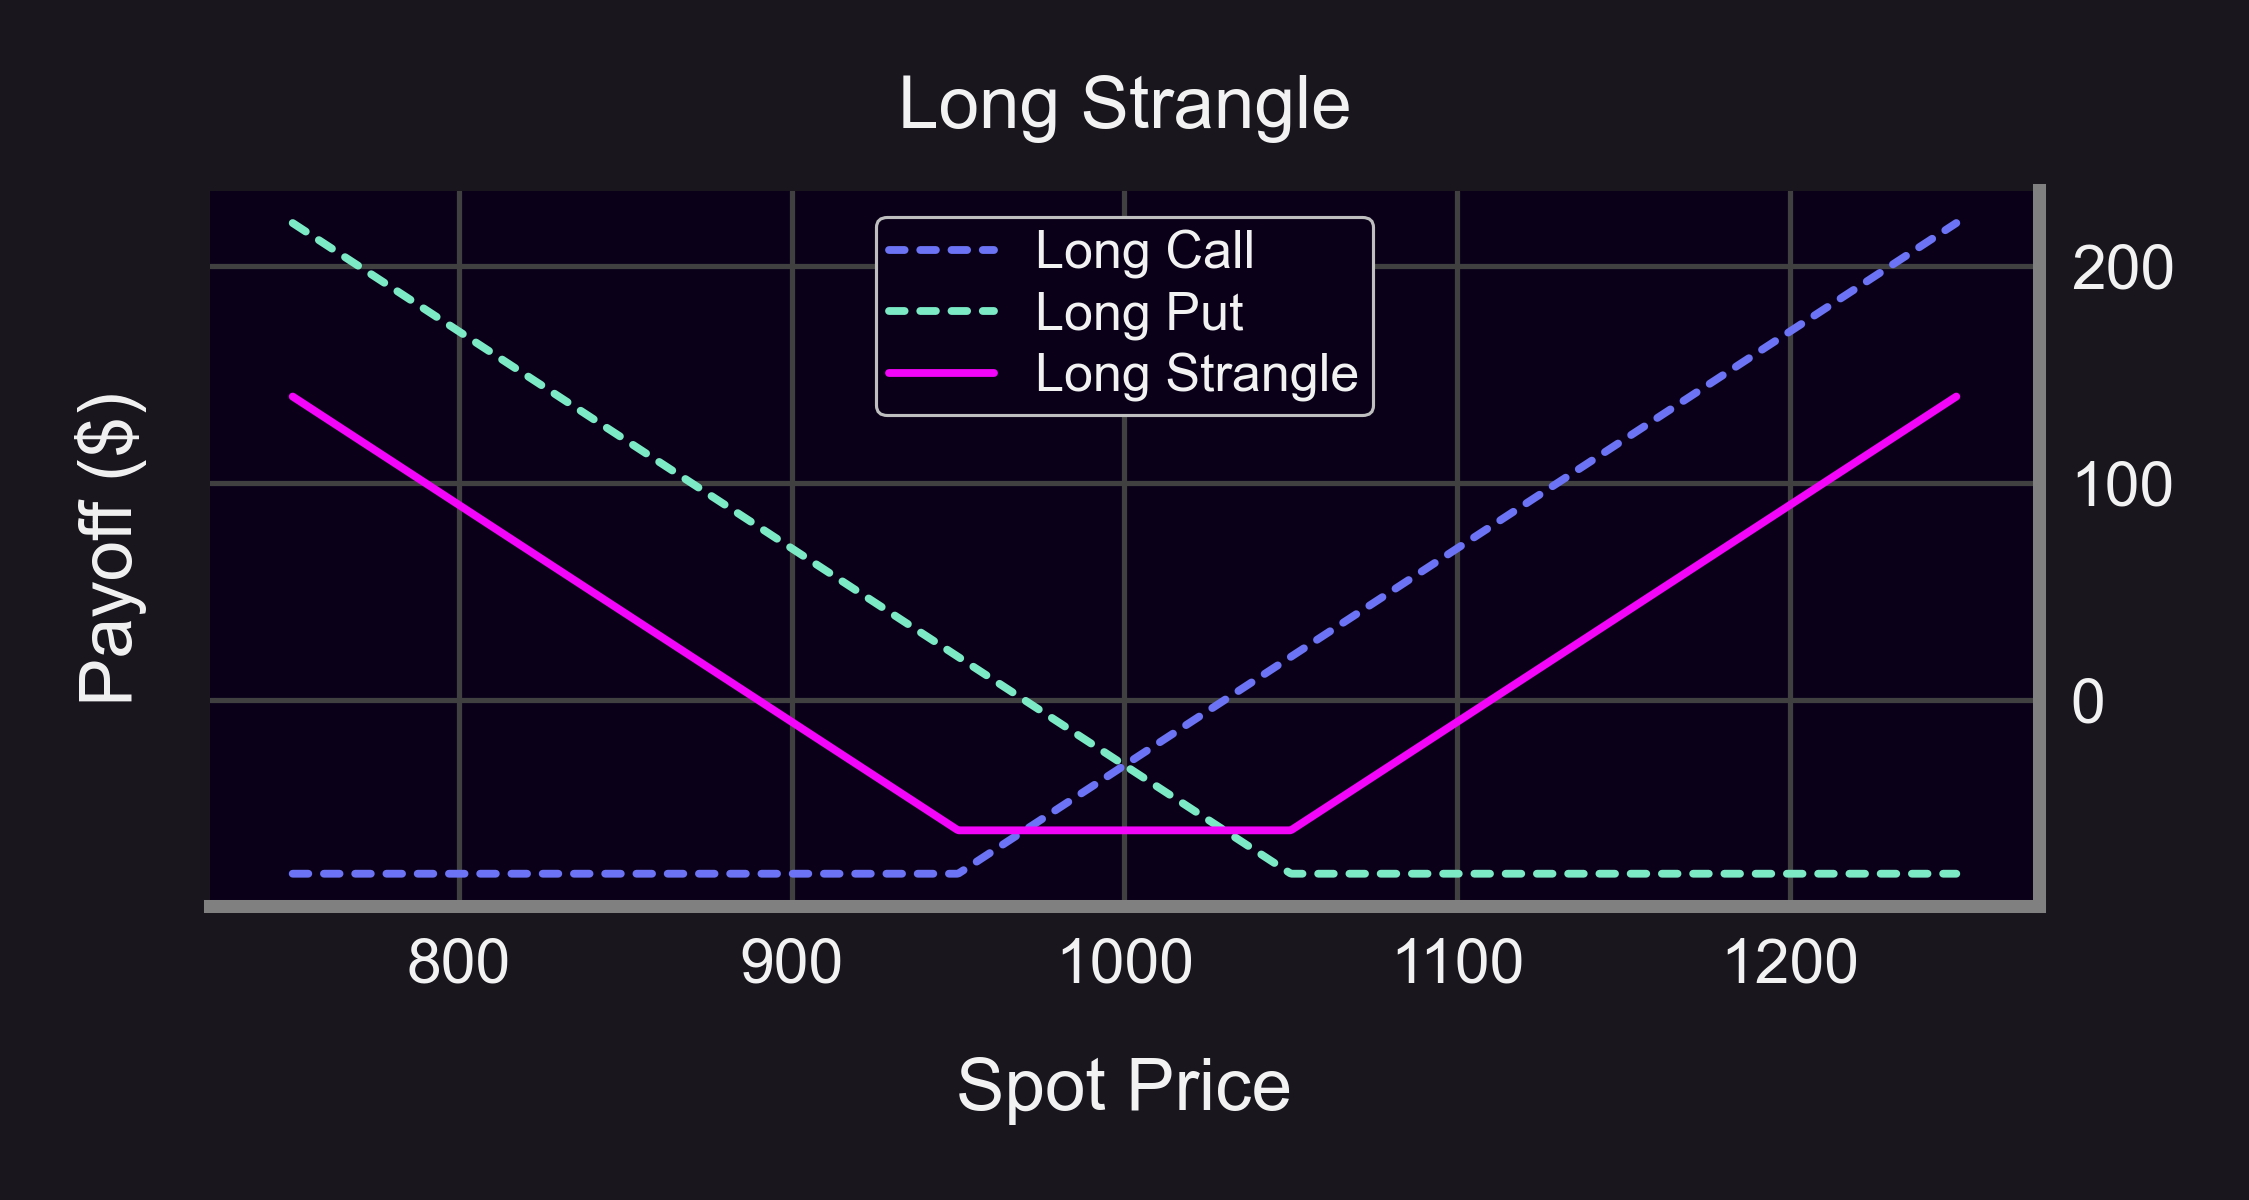

In [229]:
# Strangle = Call (higher strike) + Put (lower strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Call option
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.08
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.08
payoff_put = put(S, X, P)

plot_payoffs(S, 'Long Strangle', {'Long Call': payoff_call, 'Long Put': payoff_put})

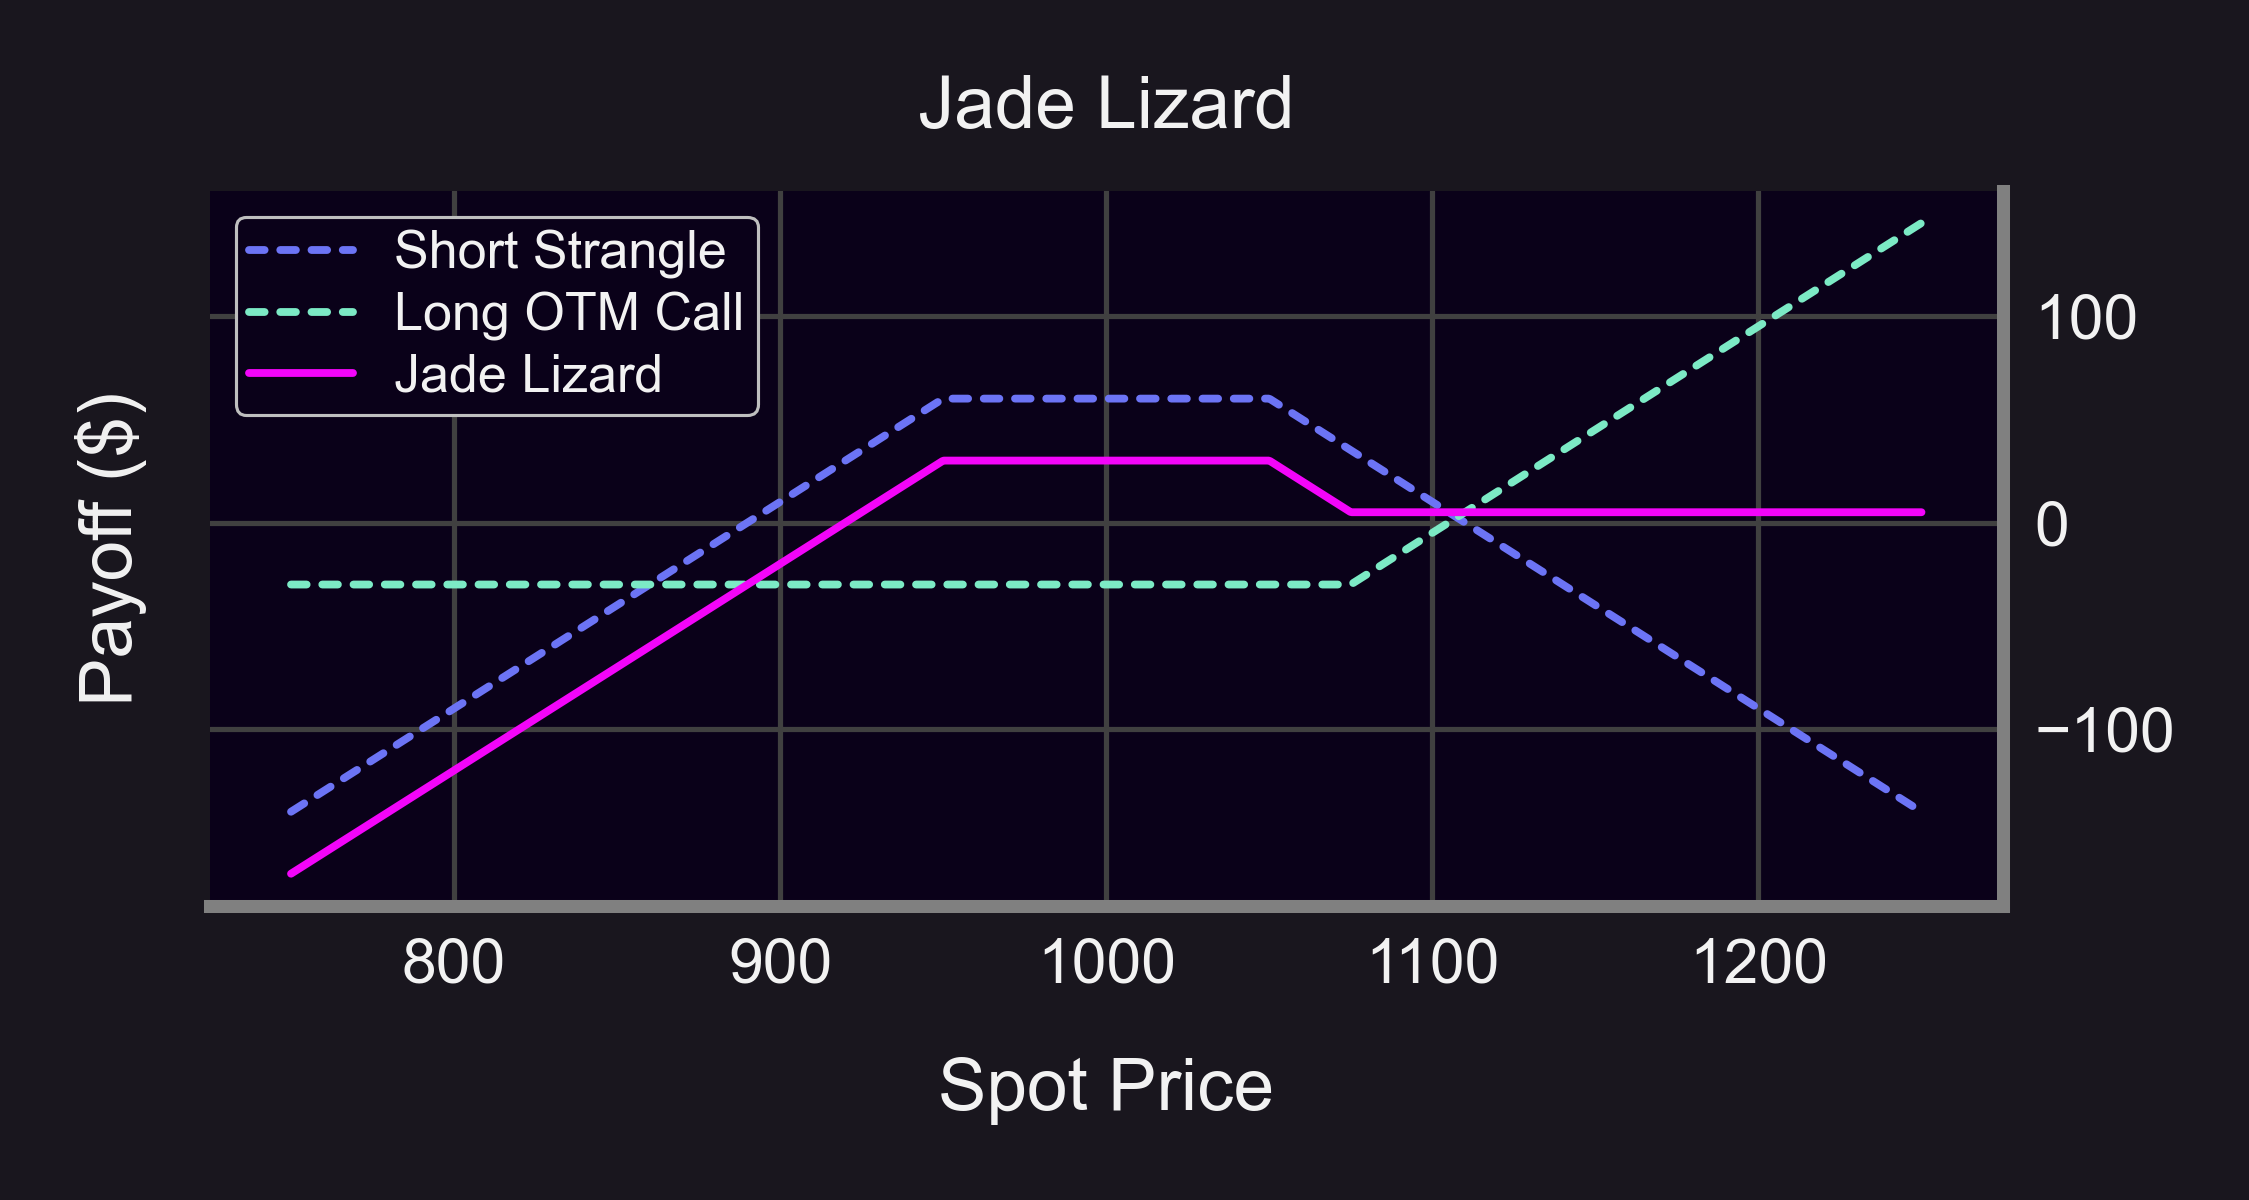

In [230]:
# Jade Lizard = Short strangle + long OTM call
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Call option
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.08
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.08
payoff_put = put(S, X, P)

short_strangle = -(payoff_call + payoff_put)

# OTM Call option
S_0 = 1_000
X = S_0 * 1.075
P = S_0 * 0.03
payoff_OTM_call = call(S, X, P)

plot_payoffs(S, 'Jade Lizard', {'Short Strangle': short_strangle, 'Long OTM Call': payoff_OTM_call})

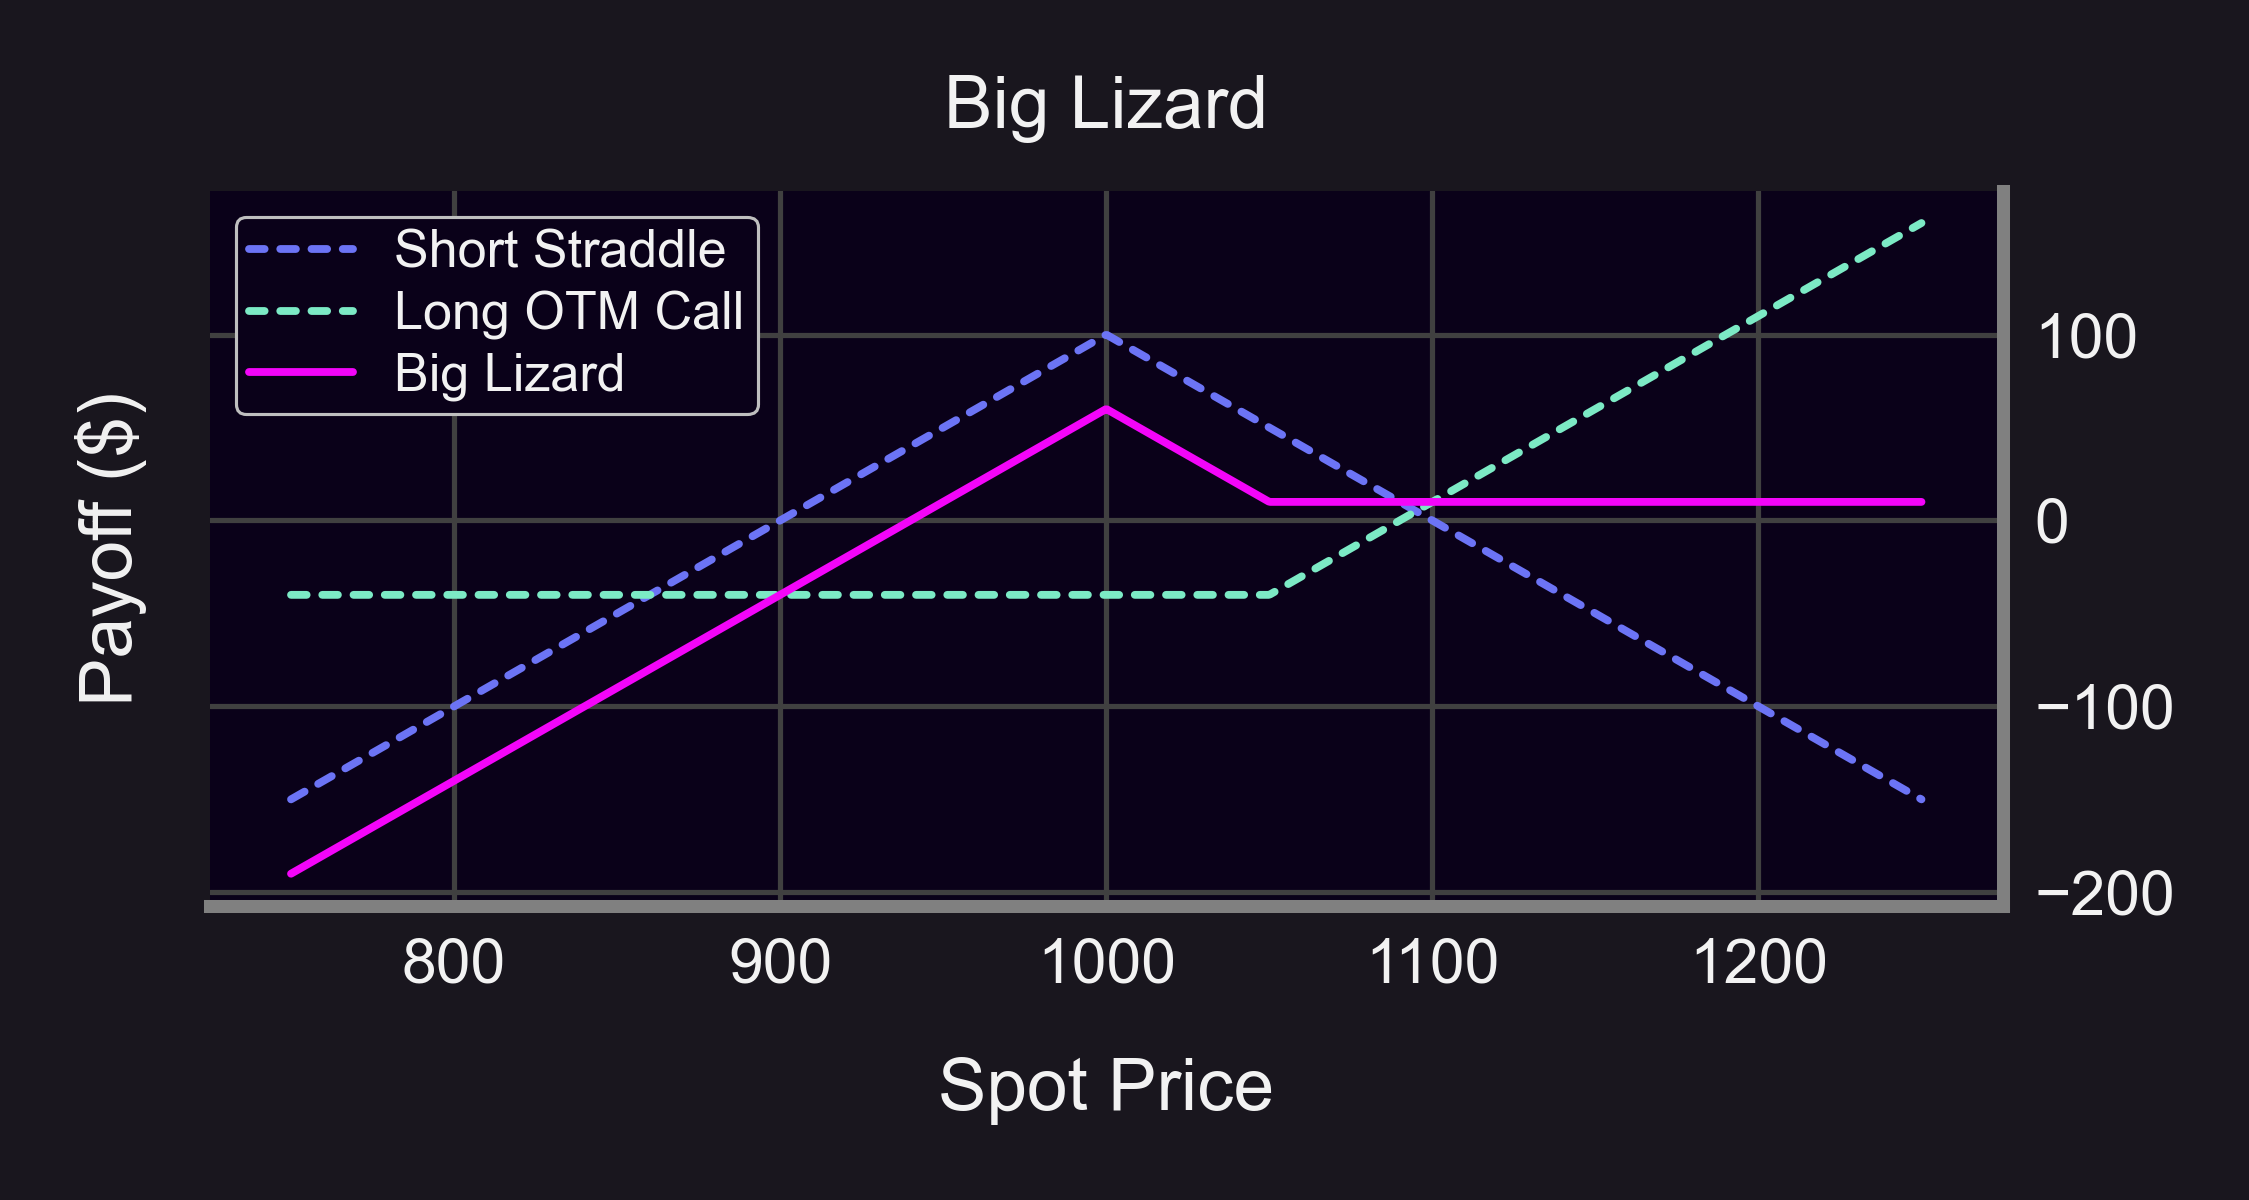

In [231]:
# Big Lizard = Short straddle + long OTM call
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Call option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_put = put(S, X, P)

short_straddle = -(payoff_call + payoff_put)

# OTM Call option
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.04
payoff_OTM_call = call(S, X, P)

plot_payoffs(S, 'Big Lizard', {'Short Straddle': short_straddle, 'Long OTM Call': payoff_OTM_call})

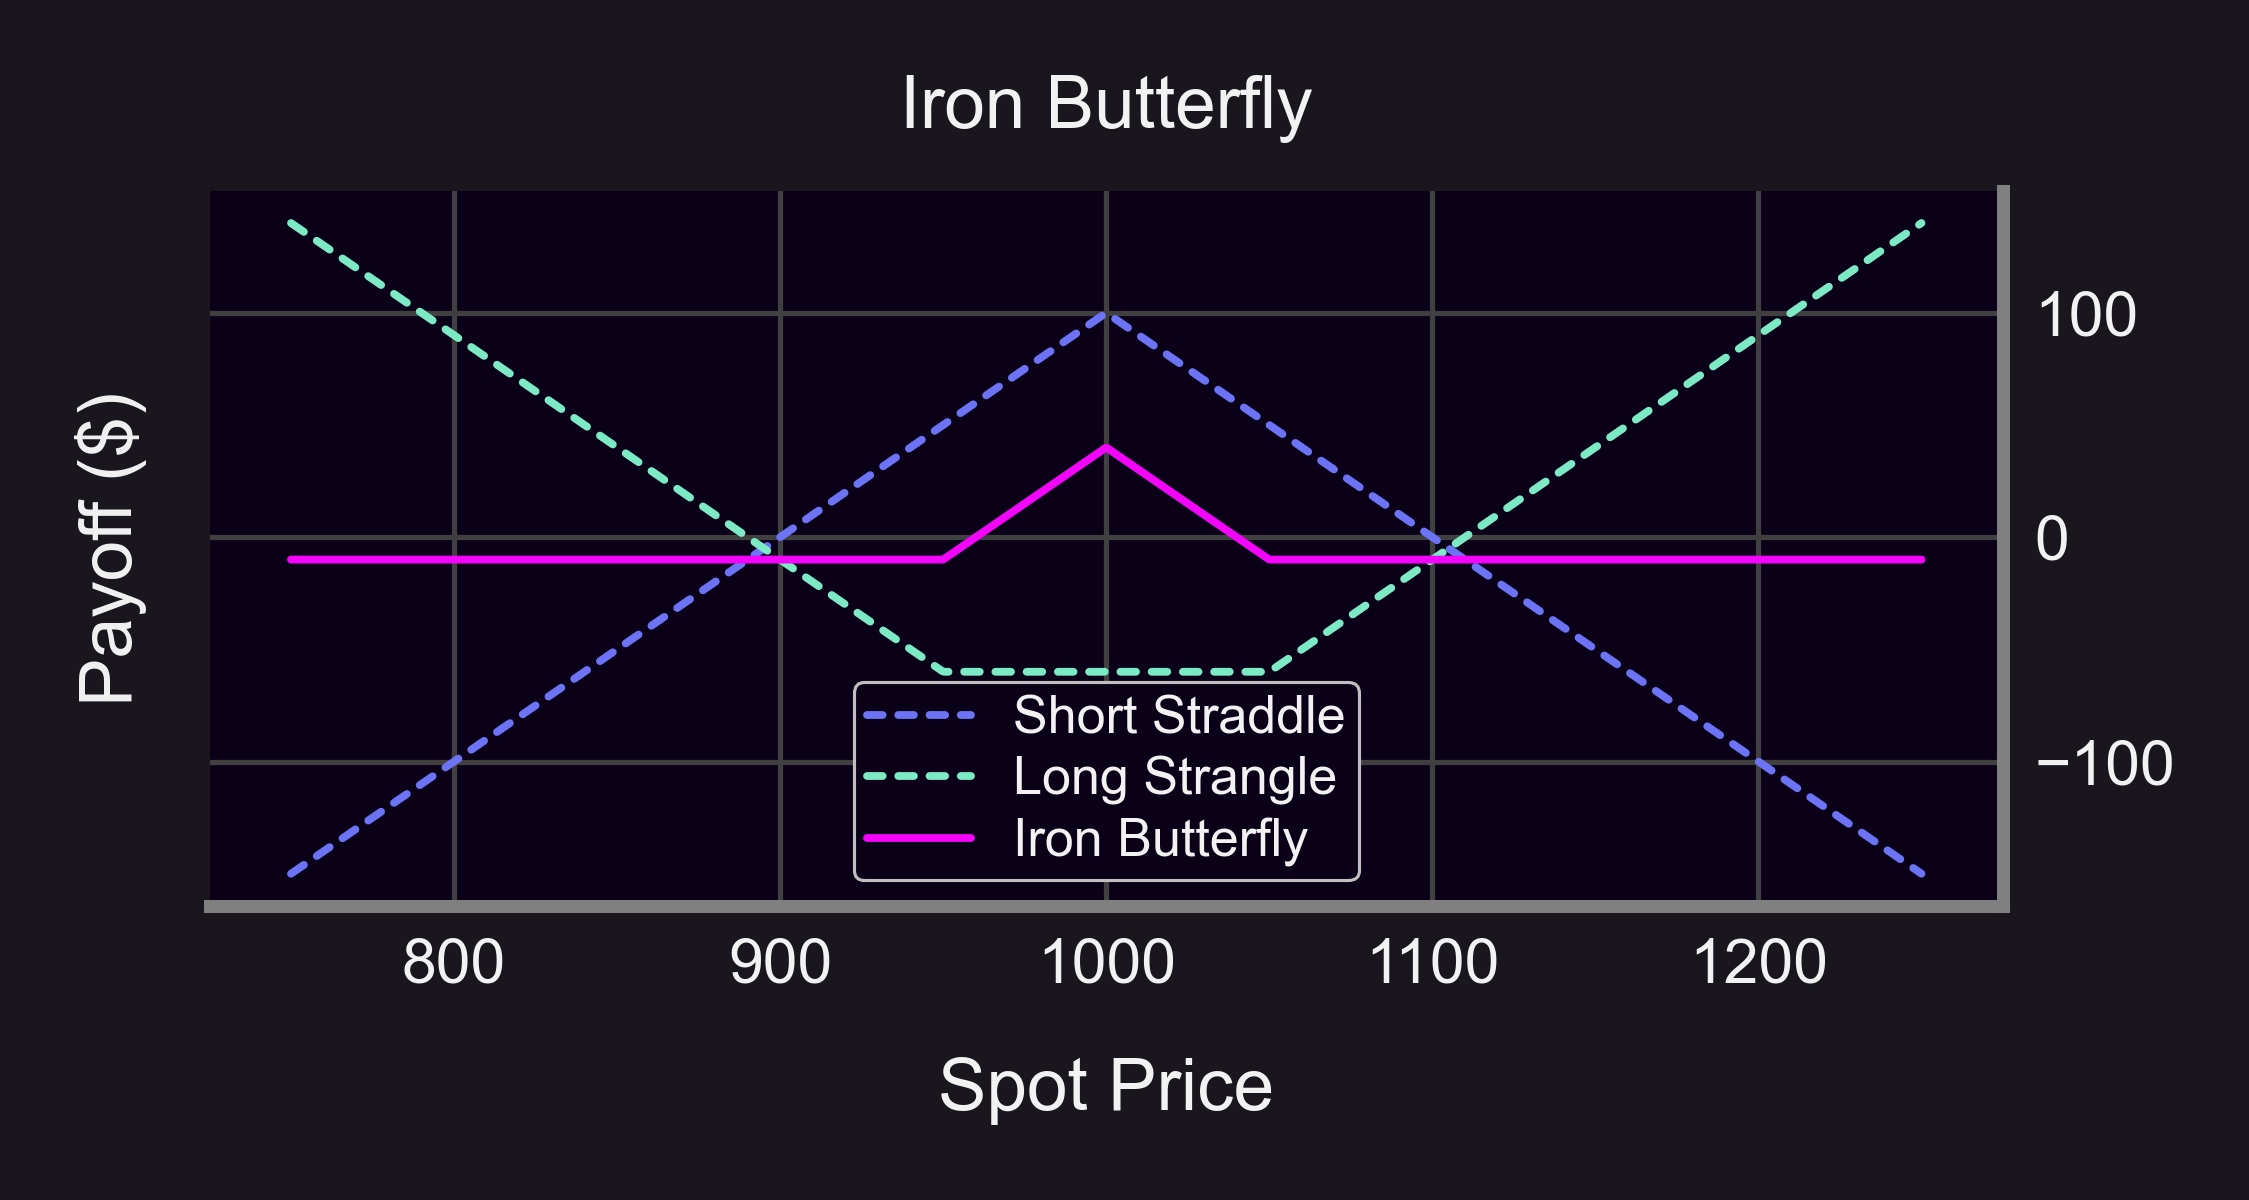

In [232]:
# Iron Butterfly = Short straddle + long strangle
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Call option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_put = put(S, X, P)

short_straddle = -(payoff_call + payoff_put)

# Call option
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.08
payoff_call = call(S, X, P)

# Put option
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.08
payoff_put = put(S, X, P)

long_strangle = payoff_call + payoff_put

plot_payoffs(S, 'Iron Butterfly', {'Short Straddle': short_straddle, 'Long Strangle': long_strangle})

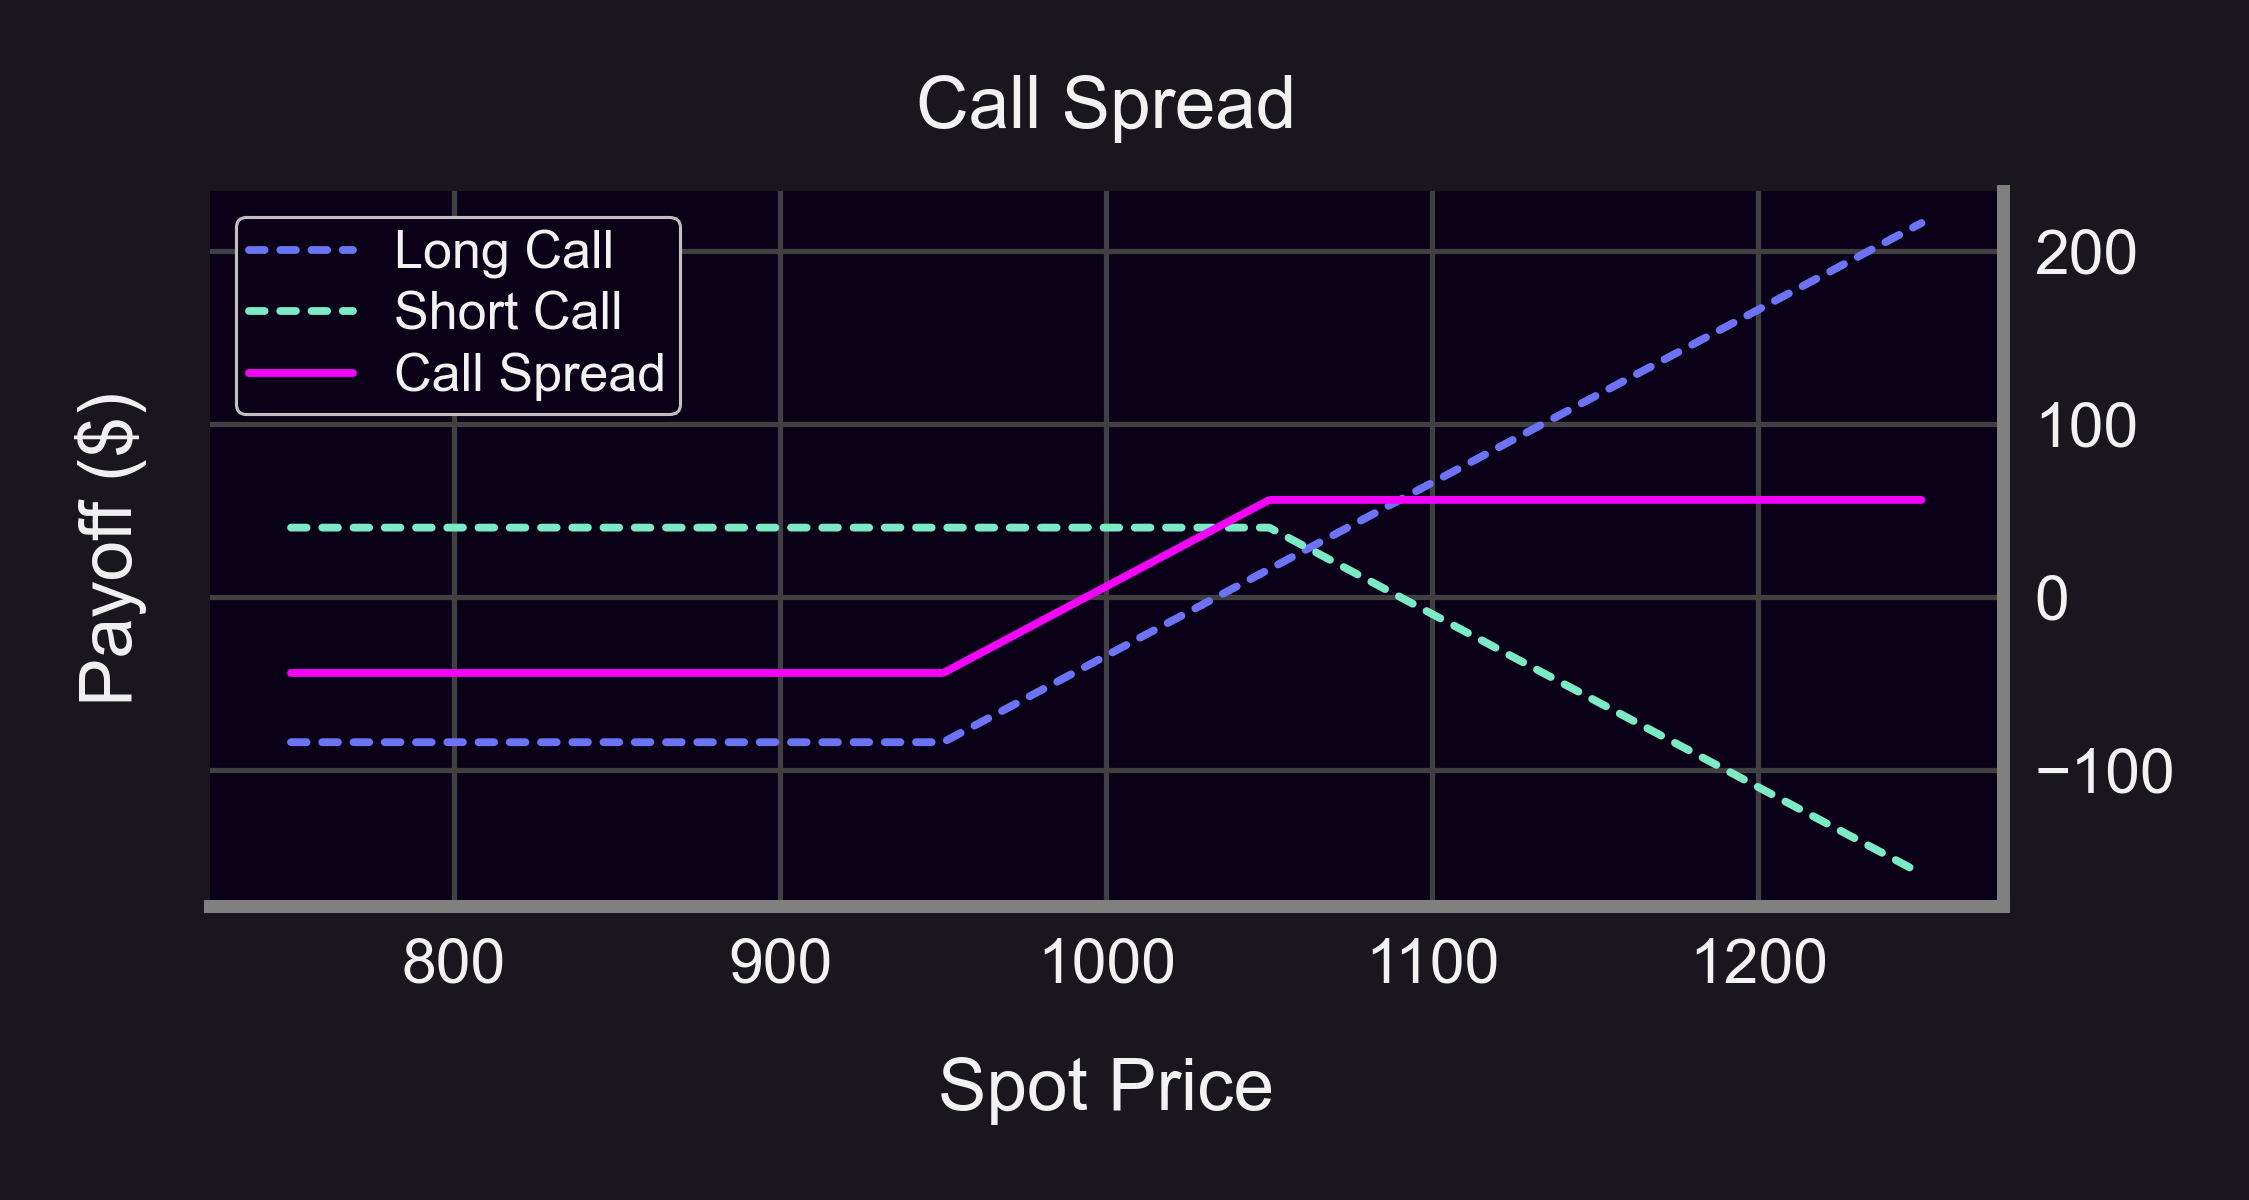

In [233]:
# Call Spread = Long call (lower strike) + short call (higher strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (lower strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.084
payoff_long_call = call(S, X, P)

# Short call (higher strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.04
payoff_short_call = -call(S, X, P)

plot_payoffs(S, 'Call Spread', {'Long Call': payoff_long_call, 'Short Call': payoff_short_call})

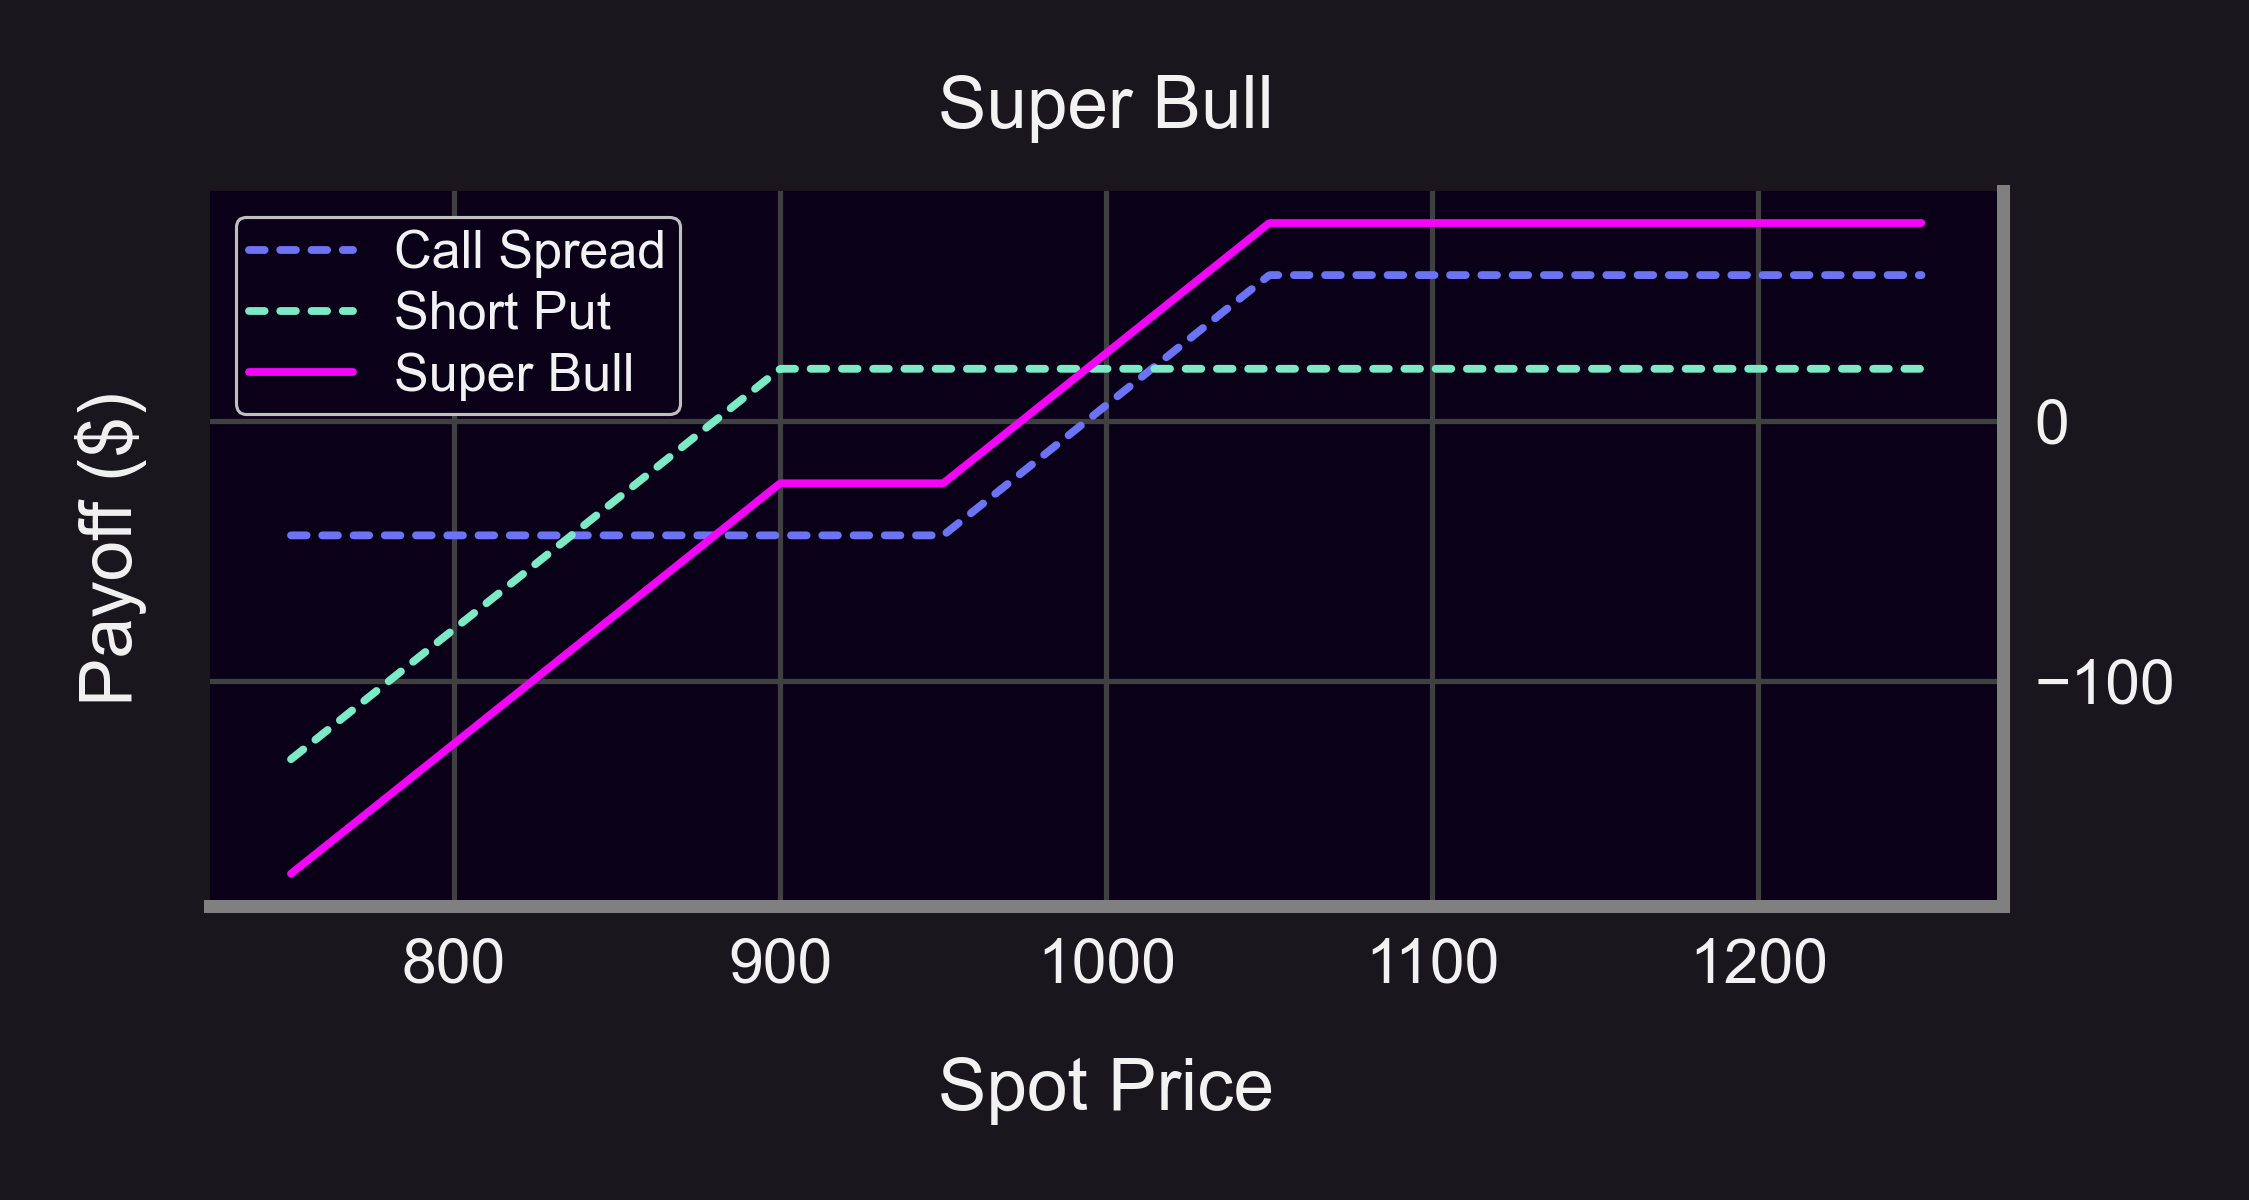

In [234]:
# Super Bull = Long call spread + short OTM put
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (lower strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.084
payoff_long_call = call(S, X, P)

# Short call (higher strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.04
payoff_short_call = -call(S, X, P)

payoff_call_spread = payoff_long_call + payoff_short_call

# Short OTM put
S_0 = 1_000
X = S_0 * 0.9
P = S_0 * 0.02
payoff_short_put = -put(S, X, P)

plot_payoffs(S, 'Super Bull', {'Call Spread': payoff_call_spread, 'Short Put': payoff_short_put})

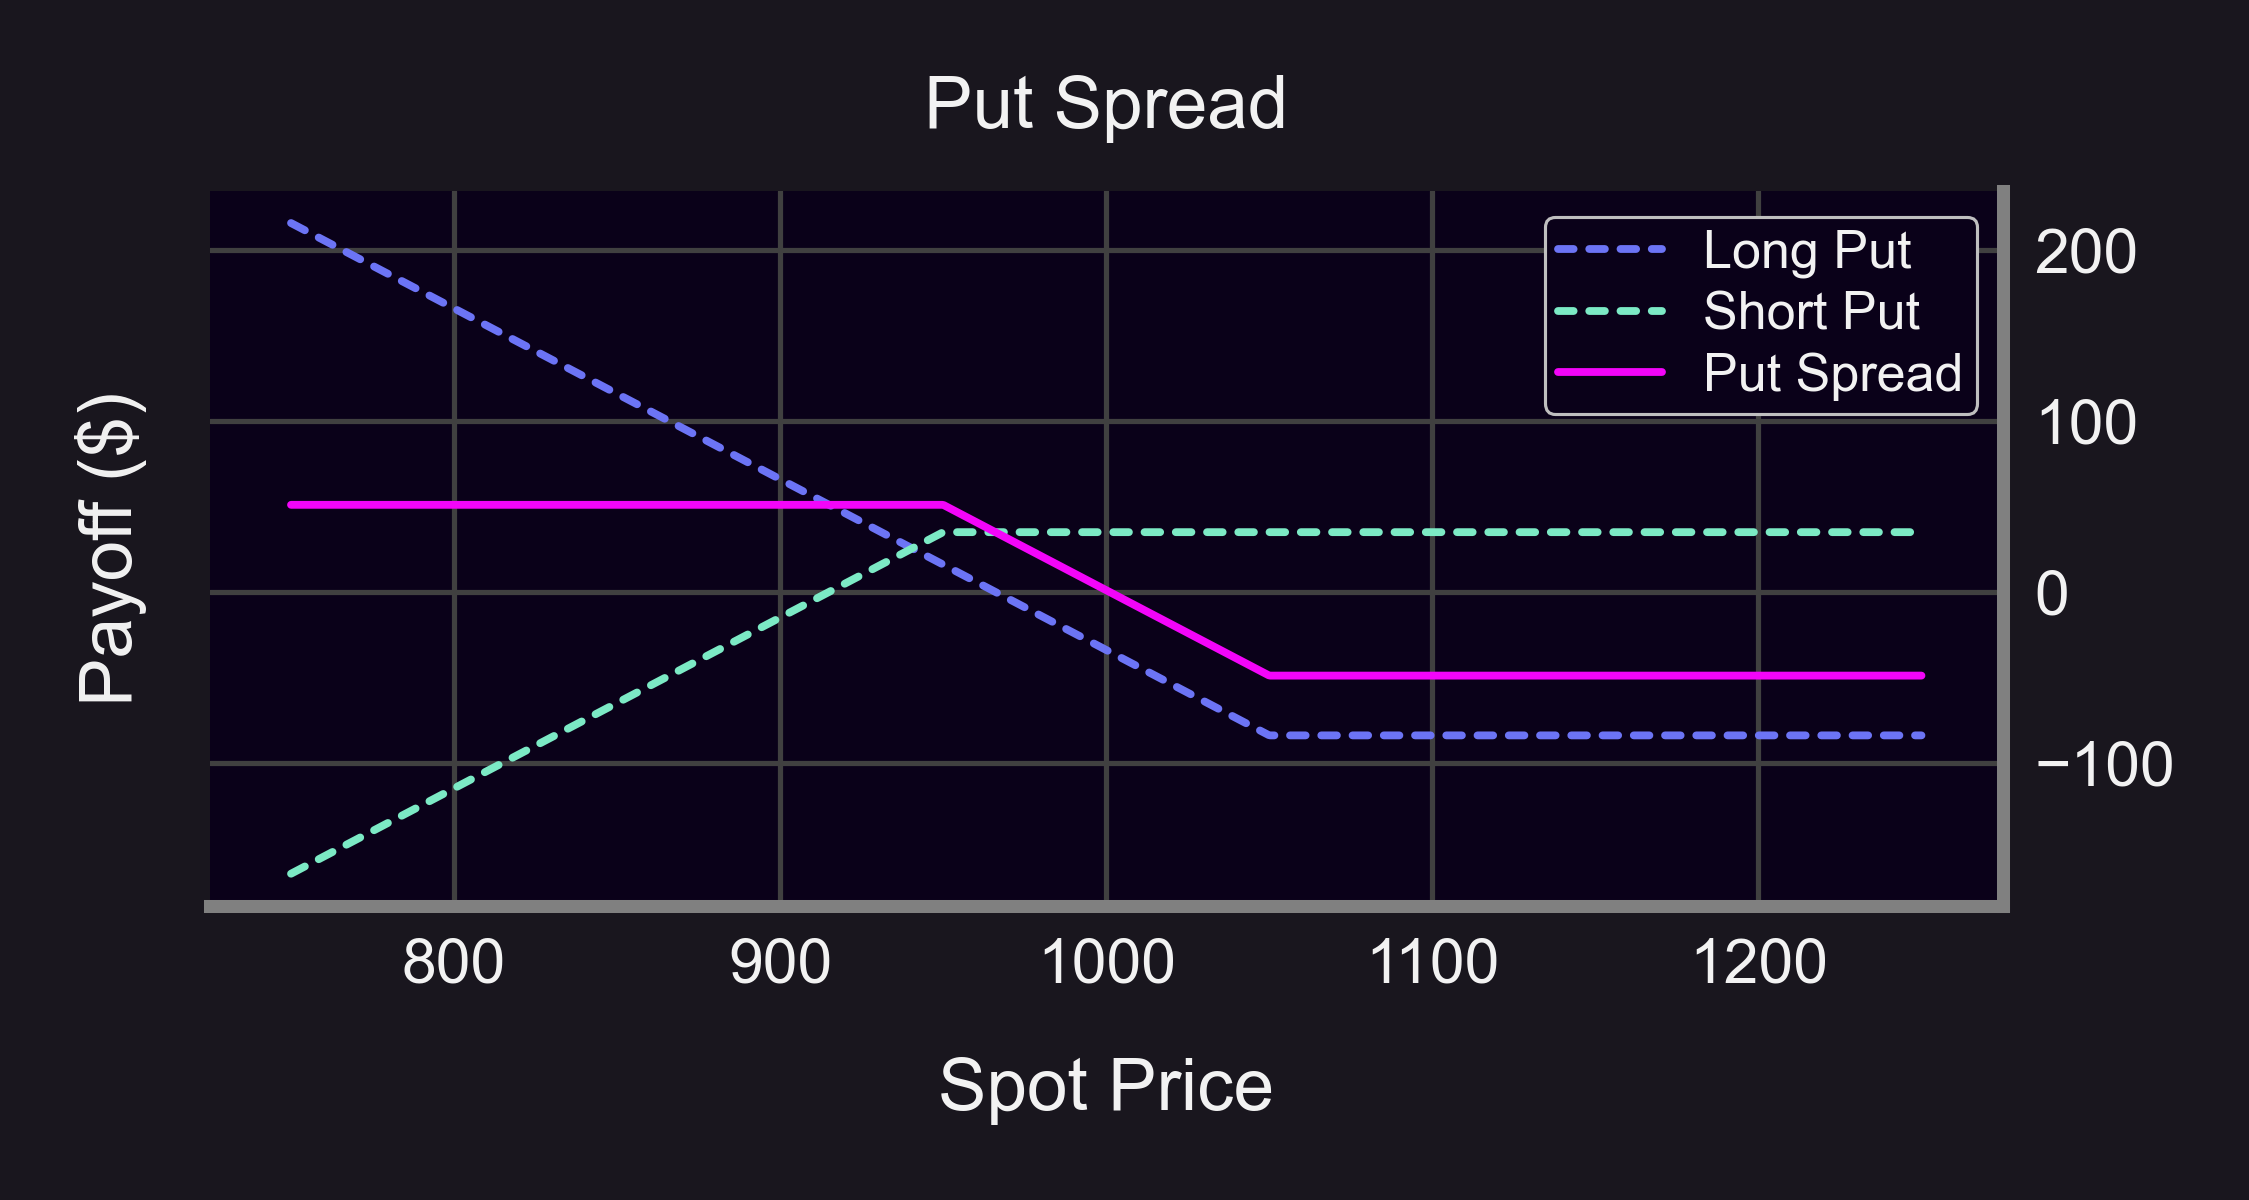

In [235]:
# Put Spread = Long put (higher strike) + short put (lower strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long put (higher strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.084
payoff_long_put = put(S, X, P)

# Short put (lower strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.035
payoff_short_put = -put(S, X, P)

plot_payoffs(S, 'Put Spread', {'Long Put': payoff_long_put, 'Short Put': payoff_short_put})

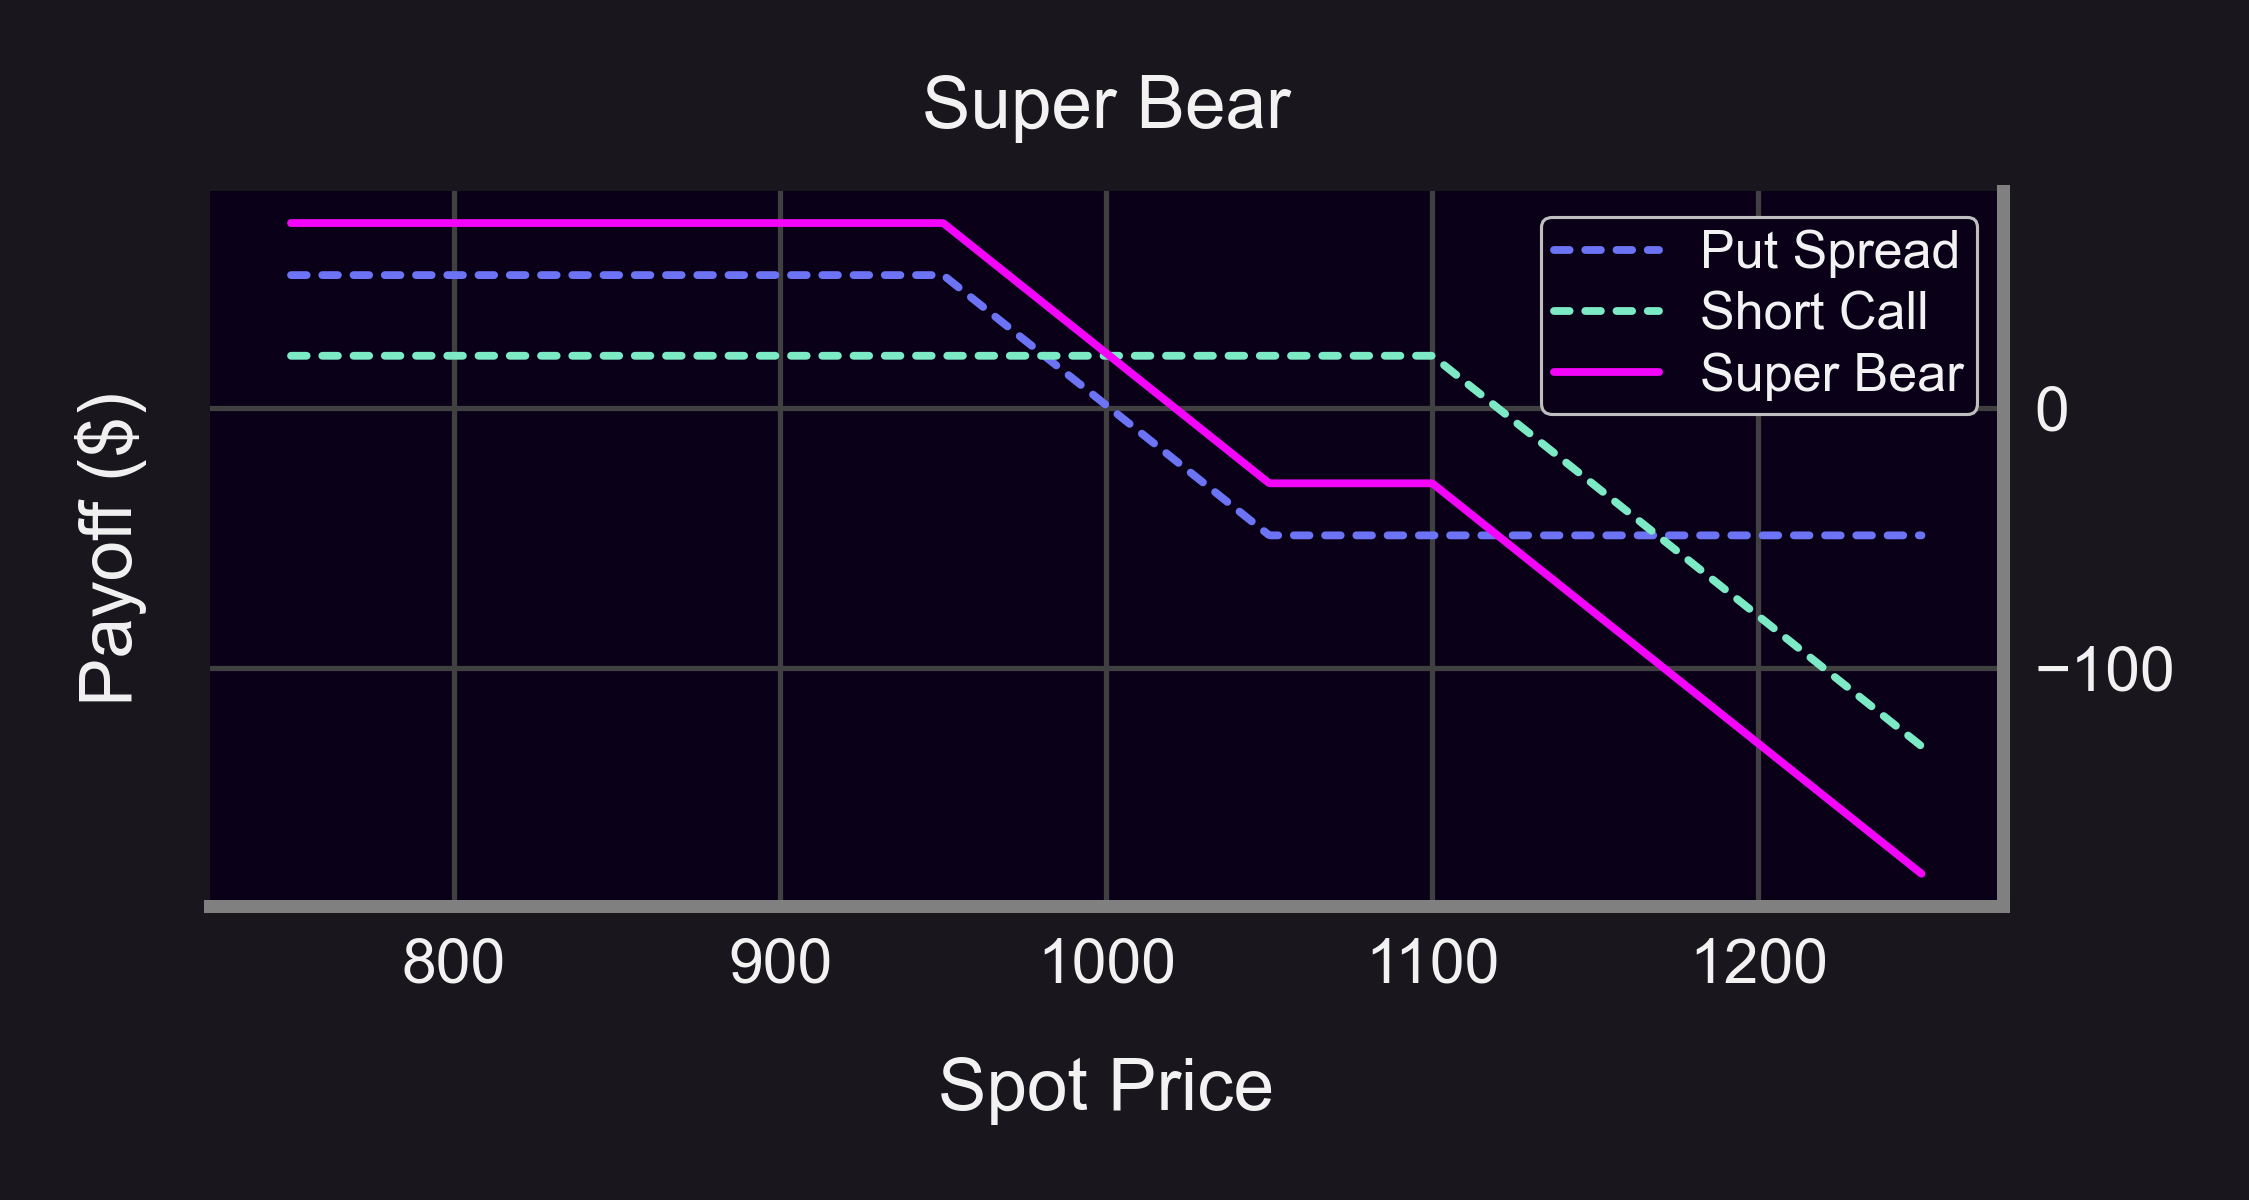

In [236]:
# Super Bear = Long put spread + short OTM call
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long put (higher strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.084
payoff_long_put = put(S, X, P)

# Short put (lower strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.035
payoff_short_put = -put(S, X, P)

payoff_put_spread = payoff_long_put + payoff_short_put

# Short OTM call
S_0 = 1_000
X = S_0 * 1.1
P = S_0 * 0.02
payoff_short_call = -call(S, X, P)

plot_payoffs(S, 'Super Bear', {'Put Spread': payoff_put_spread, 'Short Call': payoff_short_call})

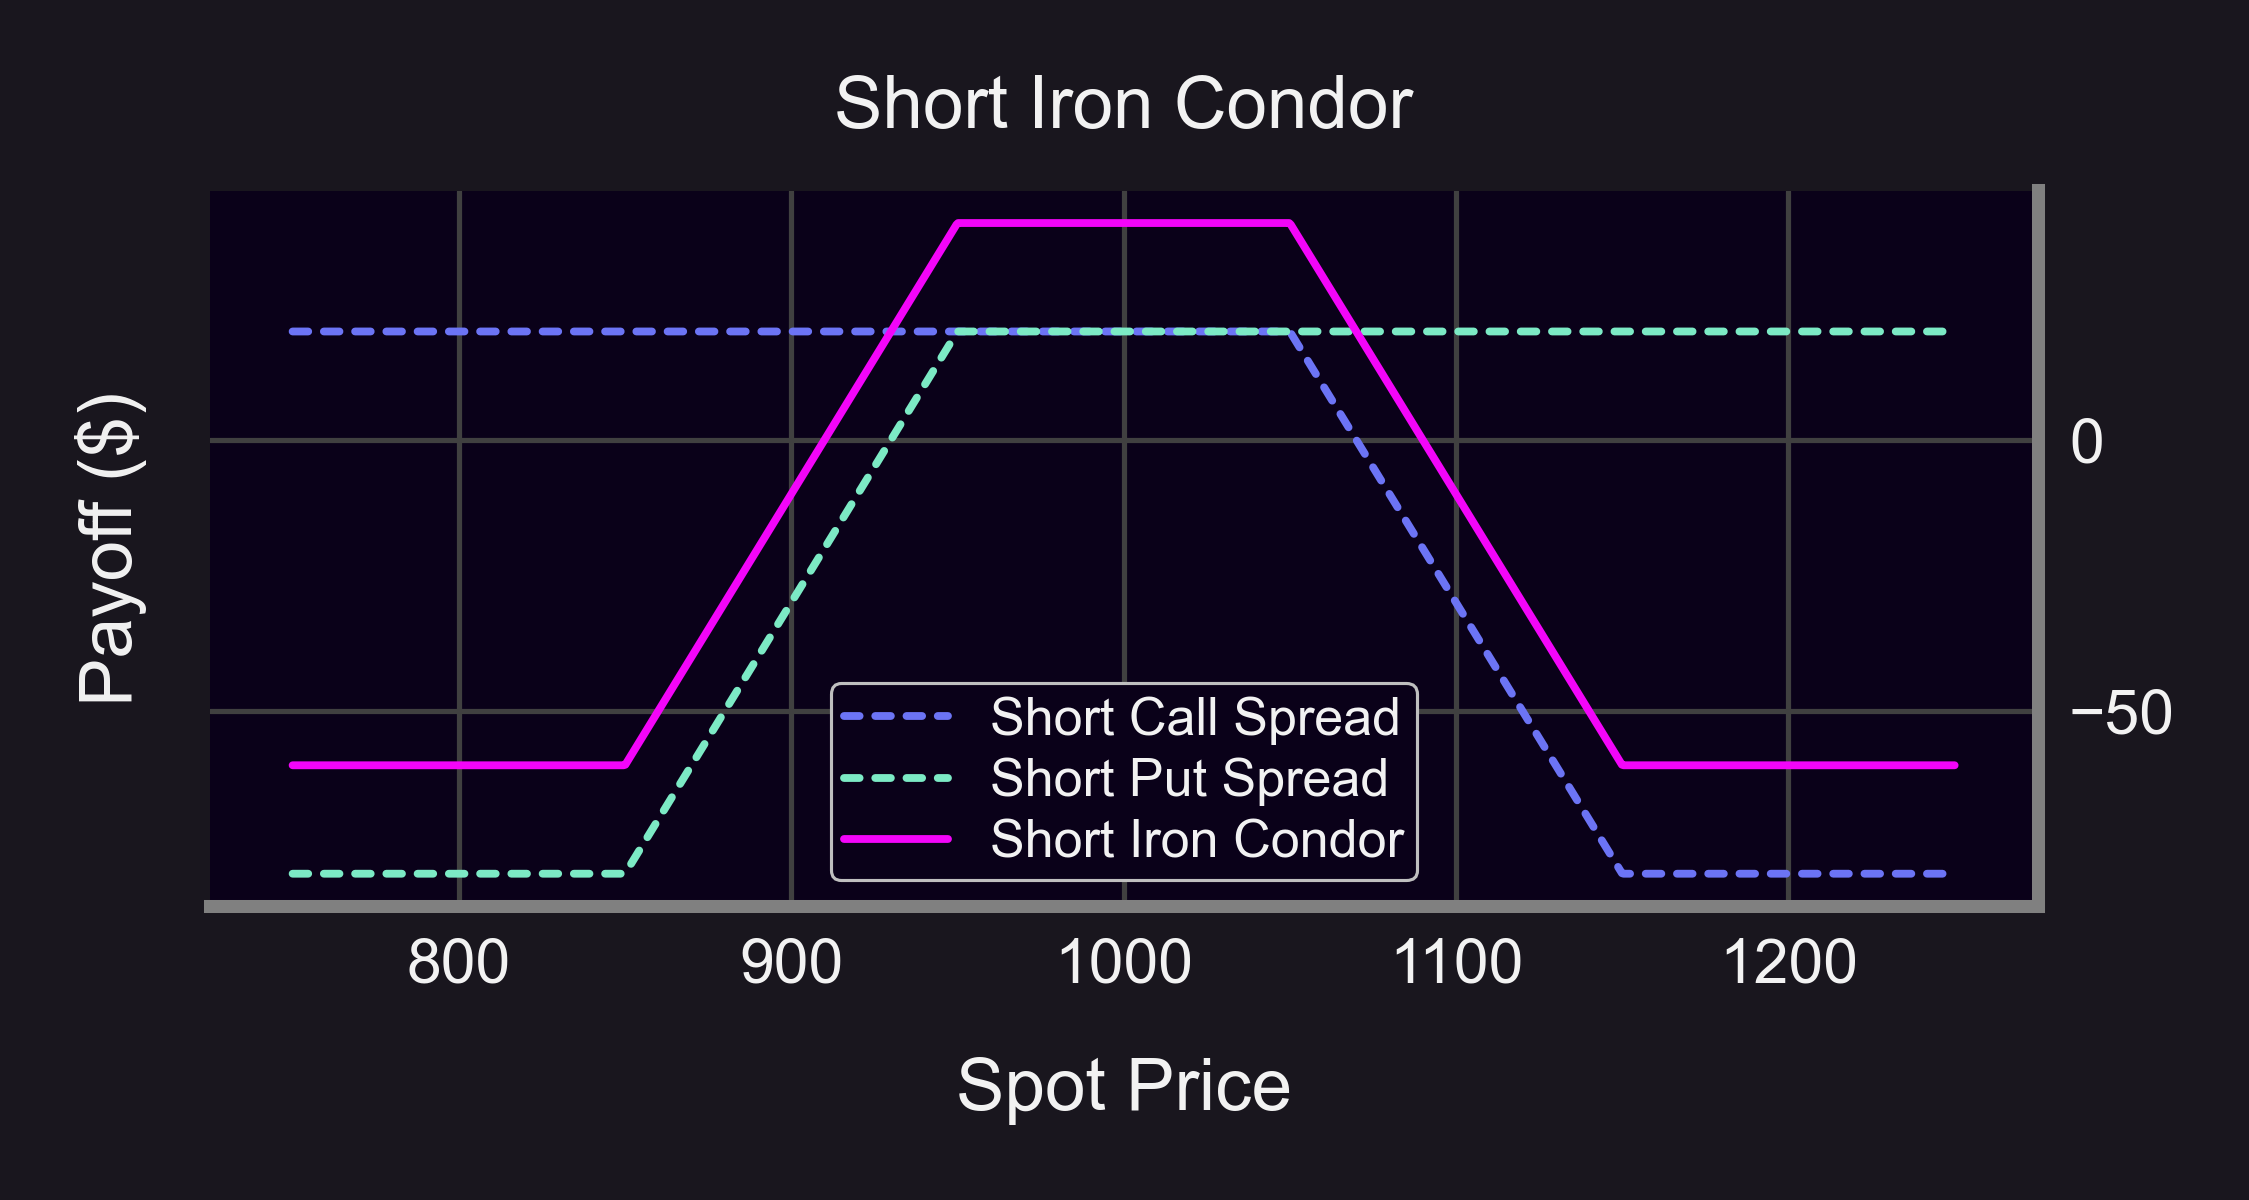

In [237]:
# Short Iron Condor = Short call spread + short put spread
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (lower strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.03
payoff_long_call = call(S, X, P)

# Short call (higher strike)
S_0 = 1_000
X = S_0 * 1.15
P = S_0 * 0.01
payoff_short_call = -call(S, X, P)

payoff_short_call_spread = -(payoff_long_call + payoff_short_call)

# Long put (higher strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.03
payoff_long_put = put(S, X, P)

# Short put (lower strike)
S_0 = 1_000
X = S_0 * 0.85
P = S_0 * 0.01
payoff_short_put = -put(S, X, P)

payoff_short_put_spread = -(payoff_long_put + payoff_short_put)

plot_payoffs(S, 'Short Iron Condor', {'Short Call Spread': payoff_short_call_spread, 'Short Put Spread': payoff_short_put_spread})

In [238]:
# https://lambert-guillaume.medium.com/how-to-create-a-perpetual-options-in-uniswap-v3-3c40007ccf1
def calc_DTE(r: float, volatility: float = 1) -> float:
    """Calculates corresponding options DTE for a UniV3 range factor"""
    return 365 * (2 * np.pi / volatility ** 2) * ( (np.sqrt(r) - 1) / (np.sqrt(r) + 1) ) ** 2

r = 1.087
print(f"A range factor of {r} corresponds to {calc_DTE(r)} days")

A range factor of 1.087 corresponds to 0.9972038529440216 days


In [239]:
def LP_3(S: list, S_0: float, capital_0: float, fee_perc: float, r: float) -> float:
    """
    Calculates payoff for UniV3 LP
    Assumes LP +/- X% around S_0
    See https://lambert-guillaume.medium.com/how-to-deploy-delta-neutral-liquidity-in-uniswap-or-why-euler-finance-is-a-game-changer-for-lps-1d91efe1e8ac

    :S (spot) price of token x in terms of token y
    :S_0 initial price of token x in terms of token y
    :capital_0 initial capital
    :fee_perc Fees collected (percent of initial capital) # This is an estimate of your earnings from LP
    :r range factor (r=1.3 --> +/- 30% range)
    """
    # Split 50/50 between tokens x and y
    x_0 = (capital_0 / S_0) / 2
    y_0 = capital_0 / 2

    # Calculate position value based spot price (S)
    S_adj = np.clip(S, S_0 / r, S_0 * r) # ensures price used for calculating token amts d/n exceed price range
    # https://atiselsts.github.io/pdfs/uniswap-v3-liquidity-math.pdf
    L_x = x_0 * ((np.sqrt(S_0) * np.sqrt(S_0 * r)) / (np.sqrt(S_0 * r) - np.sqrt(S_0)))
    L_y = y_0 / (np.sqrt(S_0) - np.sqrt(S_0 / r))
    L = min(L_x, L_y)

    x_1 = L * (np.sqrt(S_0 * r) - np.sqrt(S_adj)) / (np.sqrt(S_adj) * np.sqrt(S_0 * r))
    y_1 = L * (np.sqrt(S_adj) - np.sqrt(S_0 / r))
    pos_1 = x_1 * S + y_1 # in token y
    
    # Calculate estimated fees earned
    fees = (fee_perc / 100) * capital_0

    payoff = pos_1 - capital_0 + fees
    return payoff

def short_asset(S: list, S_0: float) -> float:
    payoff = S_0 - S
    return payoff
    

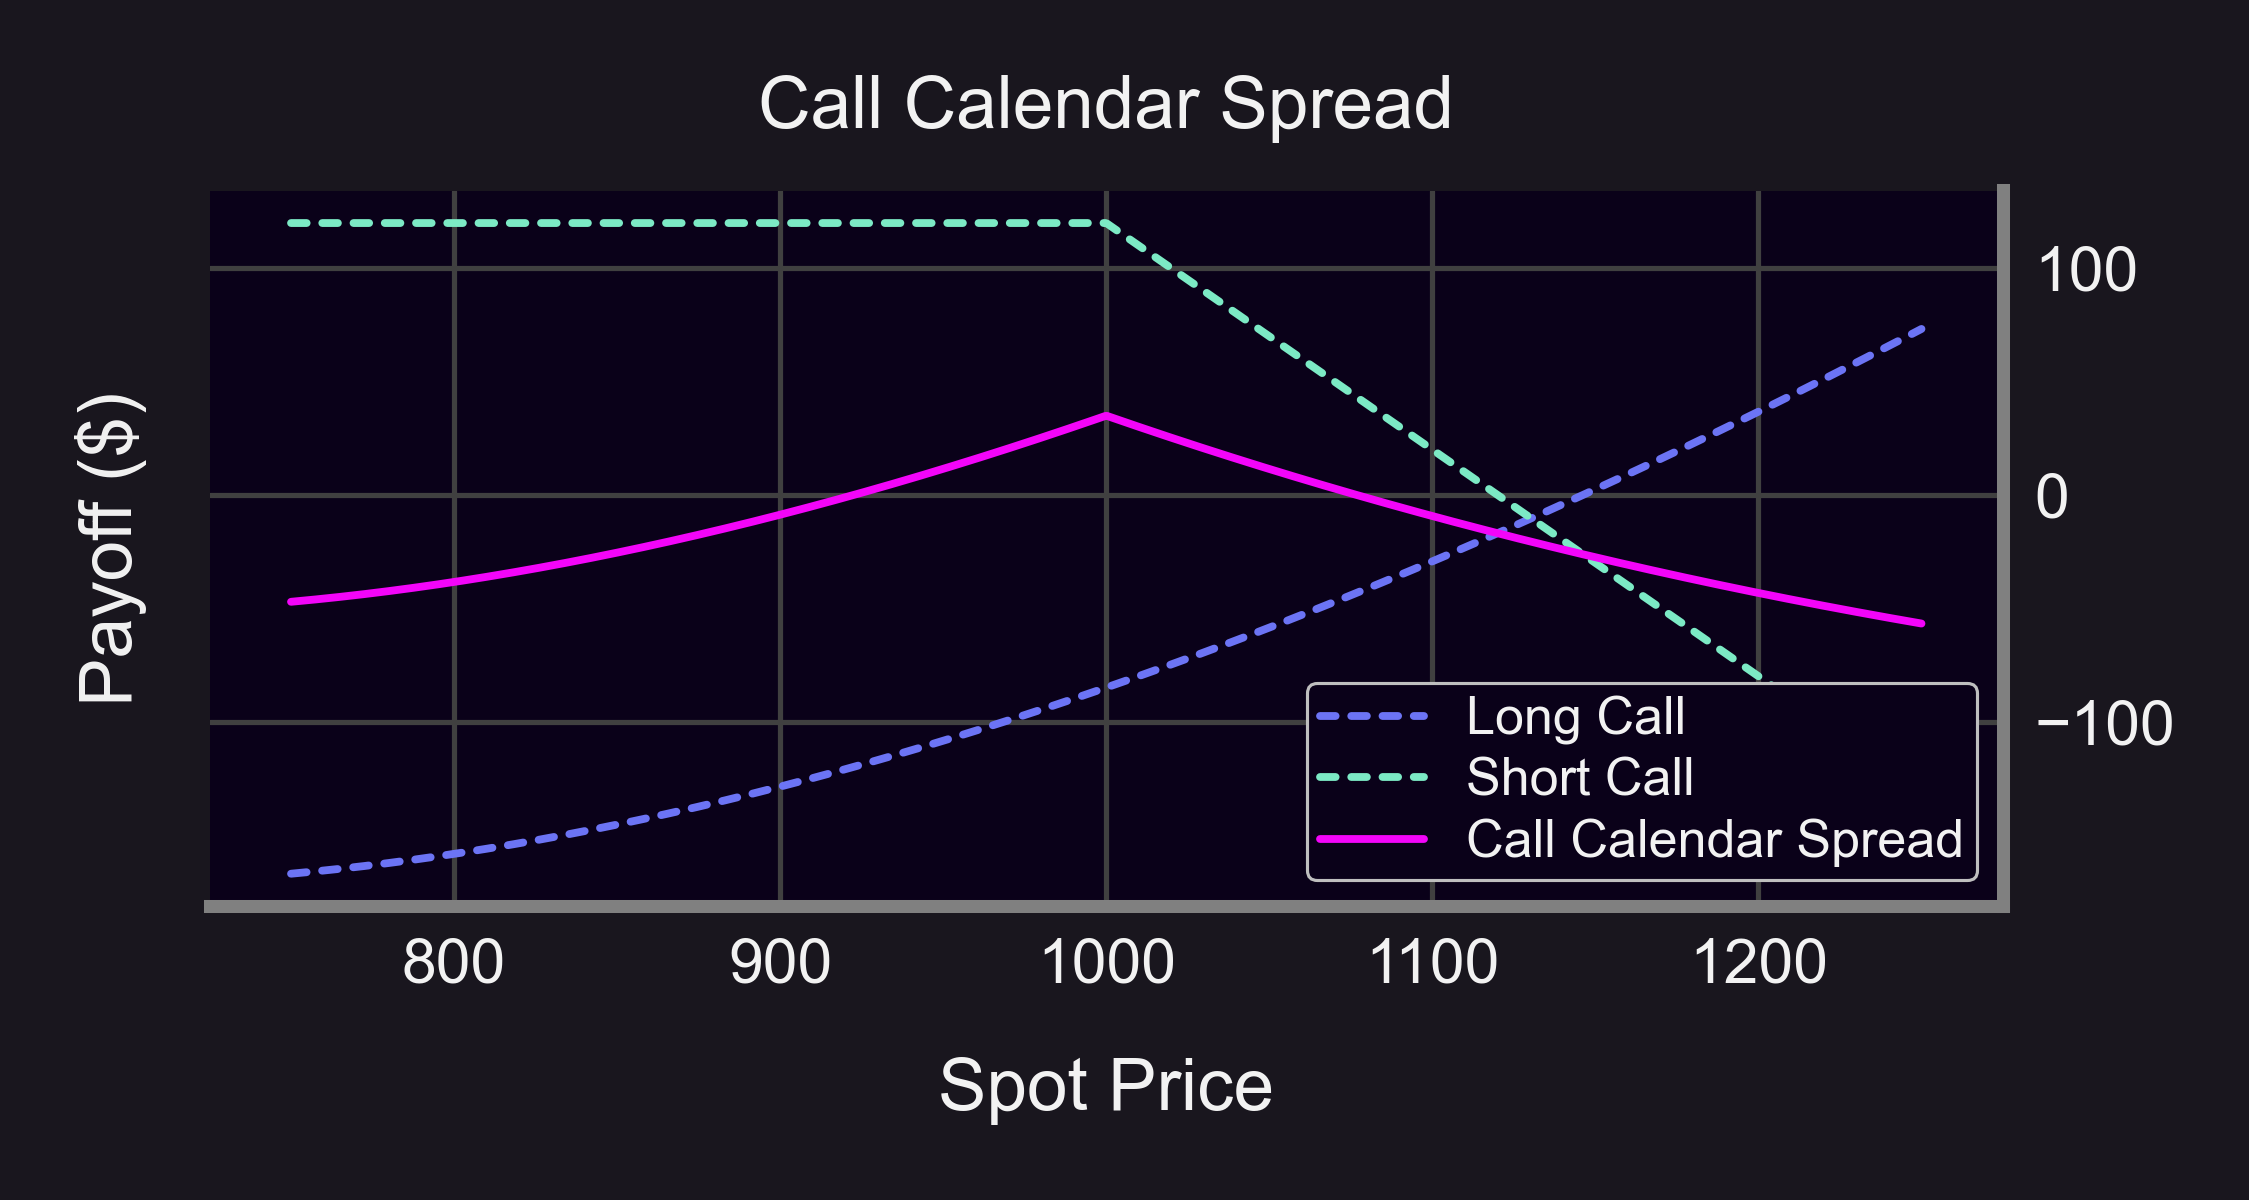

In [240]:
# Call Calendar Spread = Long long-term call + short short-term call (same strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (long-term)
# Initial parameters
capital_0 = 1_000
S_0 = 1_000
fee_perc = 8.5
r = 1.6 # range factor

# Create range of spot prices to plot
lp = LP_3(S, S_0, capital_0, fee_perc, r)
short = short_asset(S, S_0)
payoff_long_call = -(lp + short)

# Short (short-term) call
S_0 = 1_000
X = S_0
P = S_0 * 0.12
payoff_short_call = -call(S, X, P)

plot_payoffs(S, 'Call Calendar Spread', {'Long Call': payoff_long_call, 'Short Call': payoff_short_call})

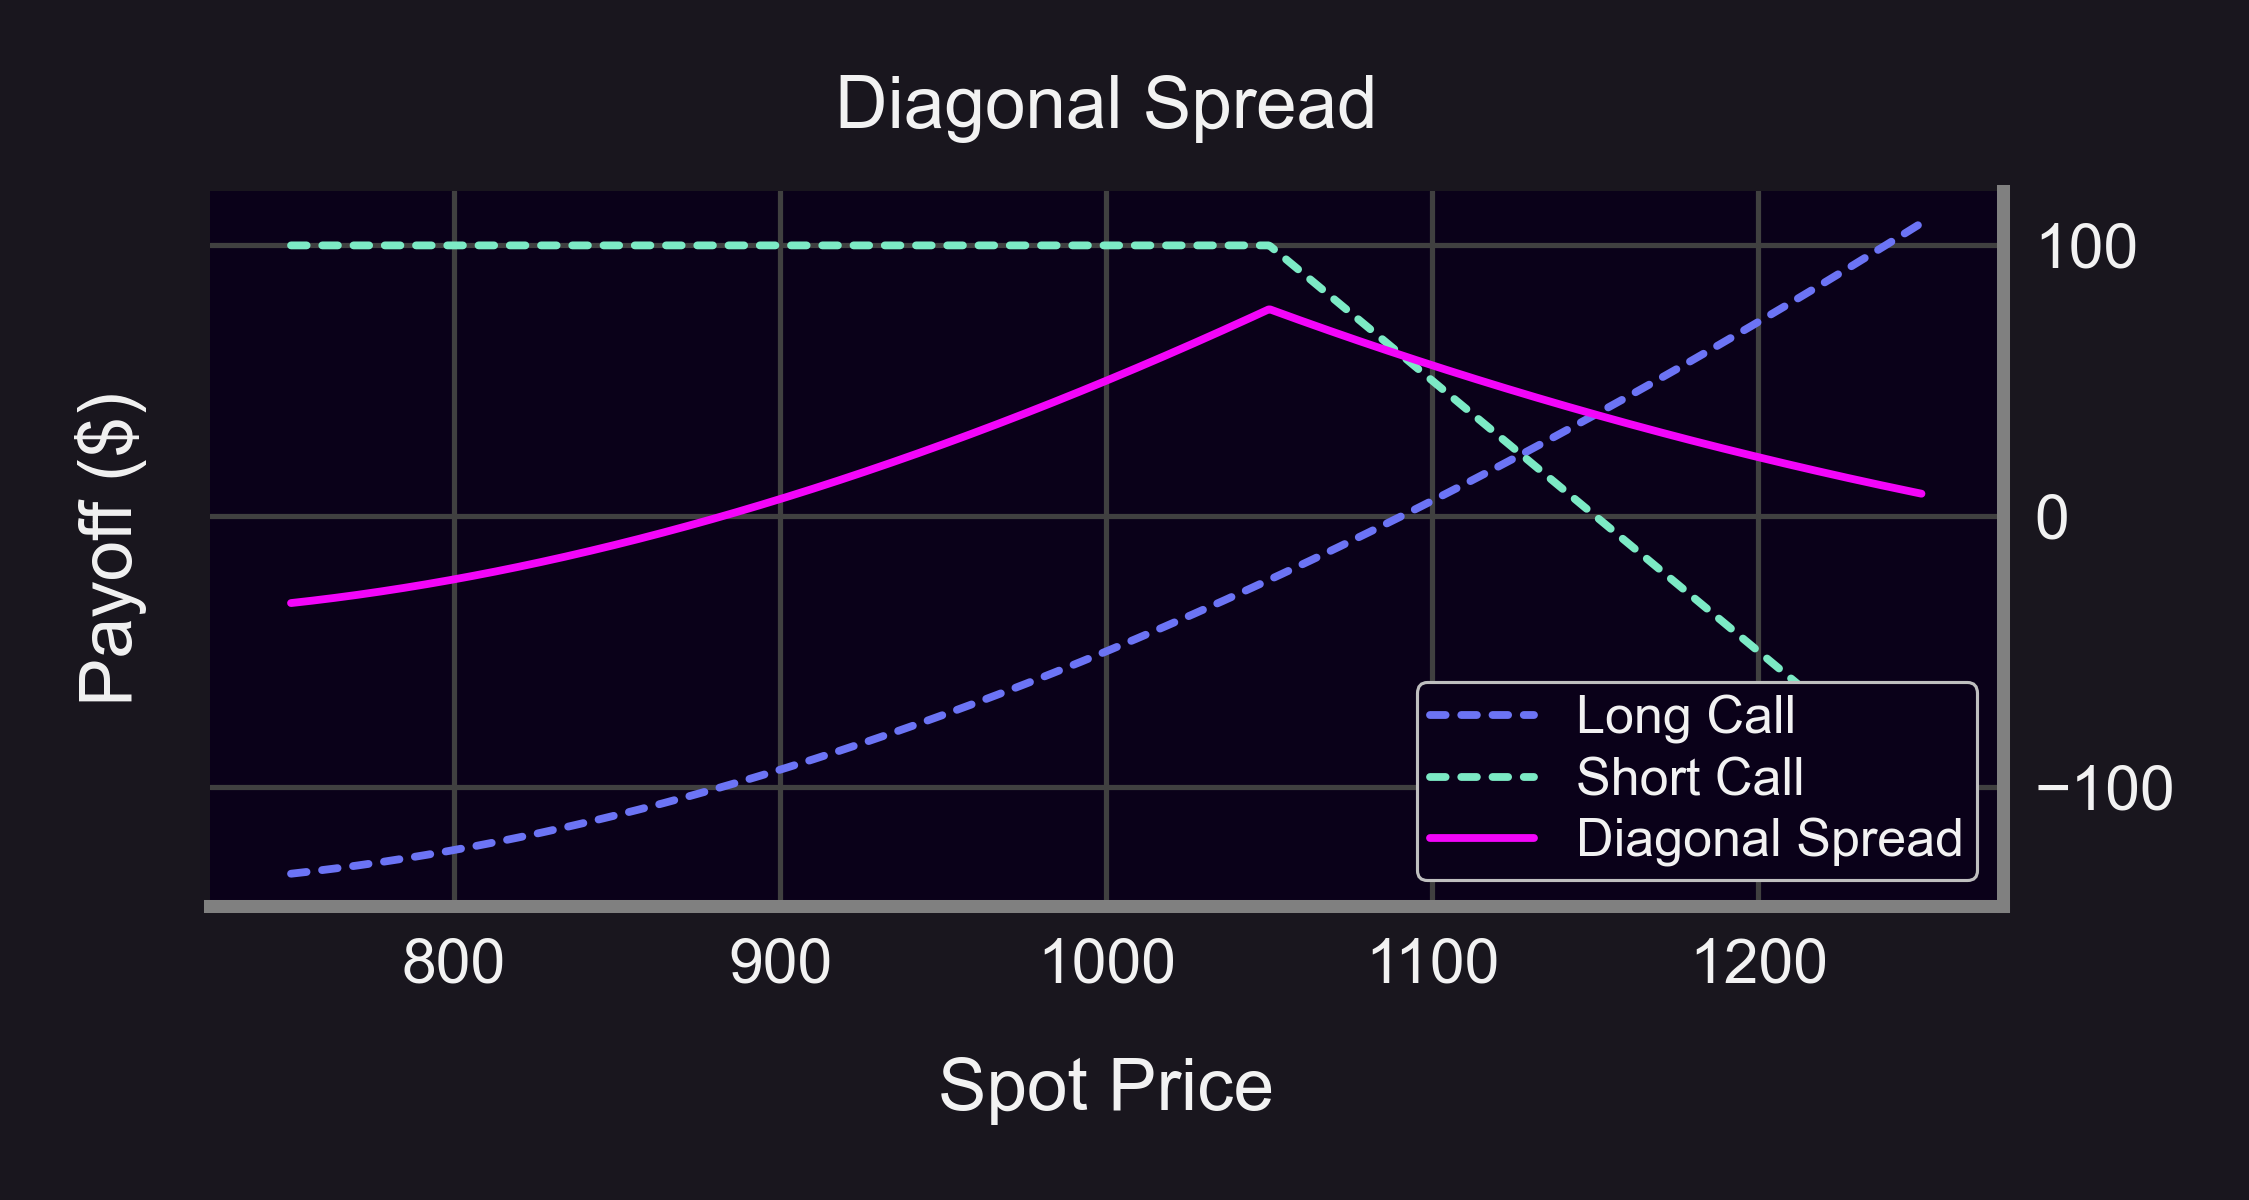

In [241]:
# Call Diagonal Spread = Long long-term call + short short-term call (different strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (long-term)
# Initial parameters
capital_0 = 1_000
S_0 = 1_000
fee_perc = 5
r = 1.6 # range factor

# Create range of spot prices to plot
lp = LP_3(S, S_0, capital_0, fee_perc, r)
short = short_asset(S, S_0)
payoff_long_call = -(lp + short)

# Short (short-term) call
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.1
payoff_short_call = -call(S, X, P)

plot_payoffs(S, 'Diagonal Spread', {'Long Call': payoff_long_call, 'Short Call': payoff_short_call})

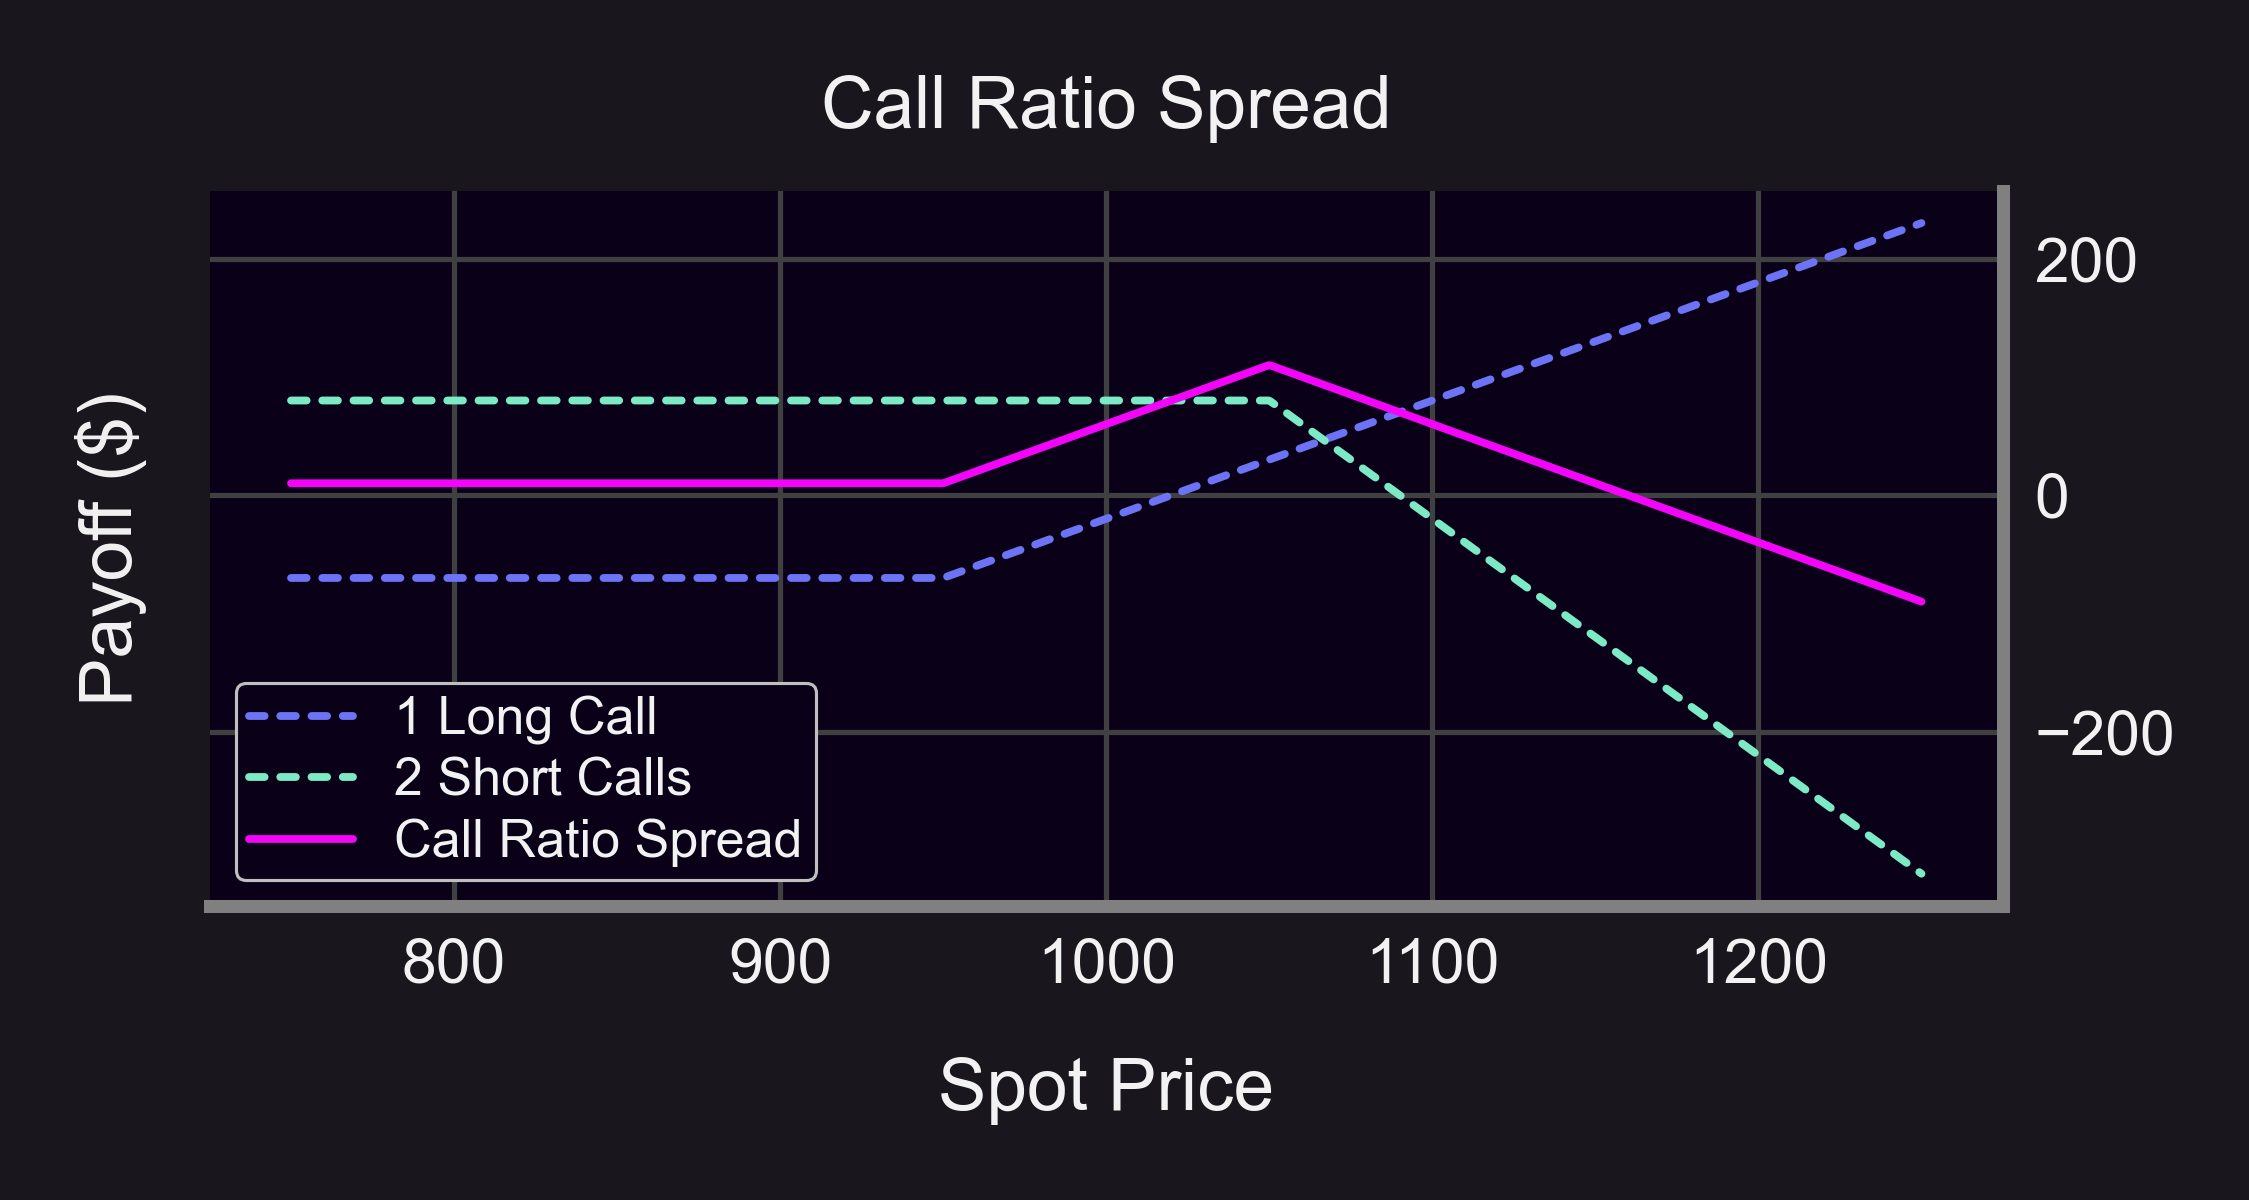

In [242]:
# Call Ratio Spread = 1 long call (lower strike) + 2 short calls (higher strike)
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (lower strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.07
payoff_long_call = call(S, X, P)

# Short call (higher strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.04
payoff_short_call_2 = -2 * call(S, X, P)

plot_payoffs(S, 'Call Ratio Spread', {'1 Long Call': payoff_long_call, '2 Short Calls': payoff_short_call_2})

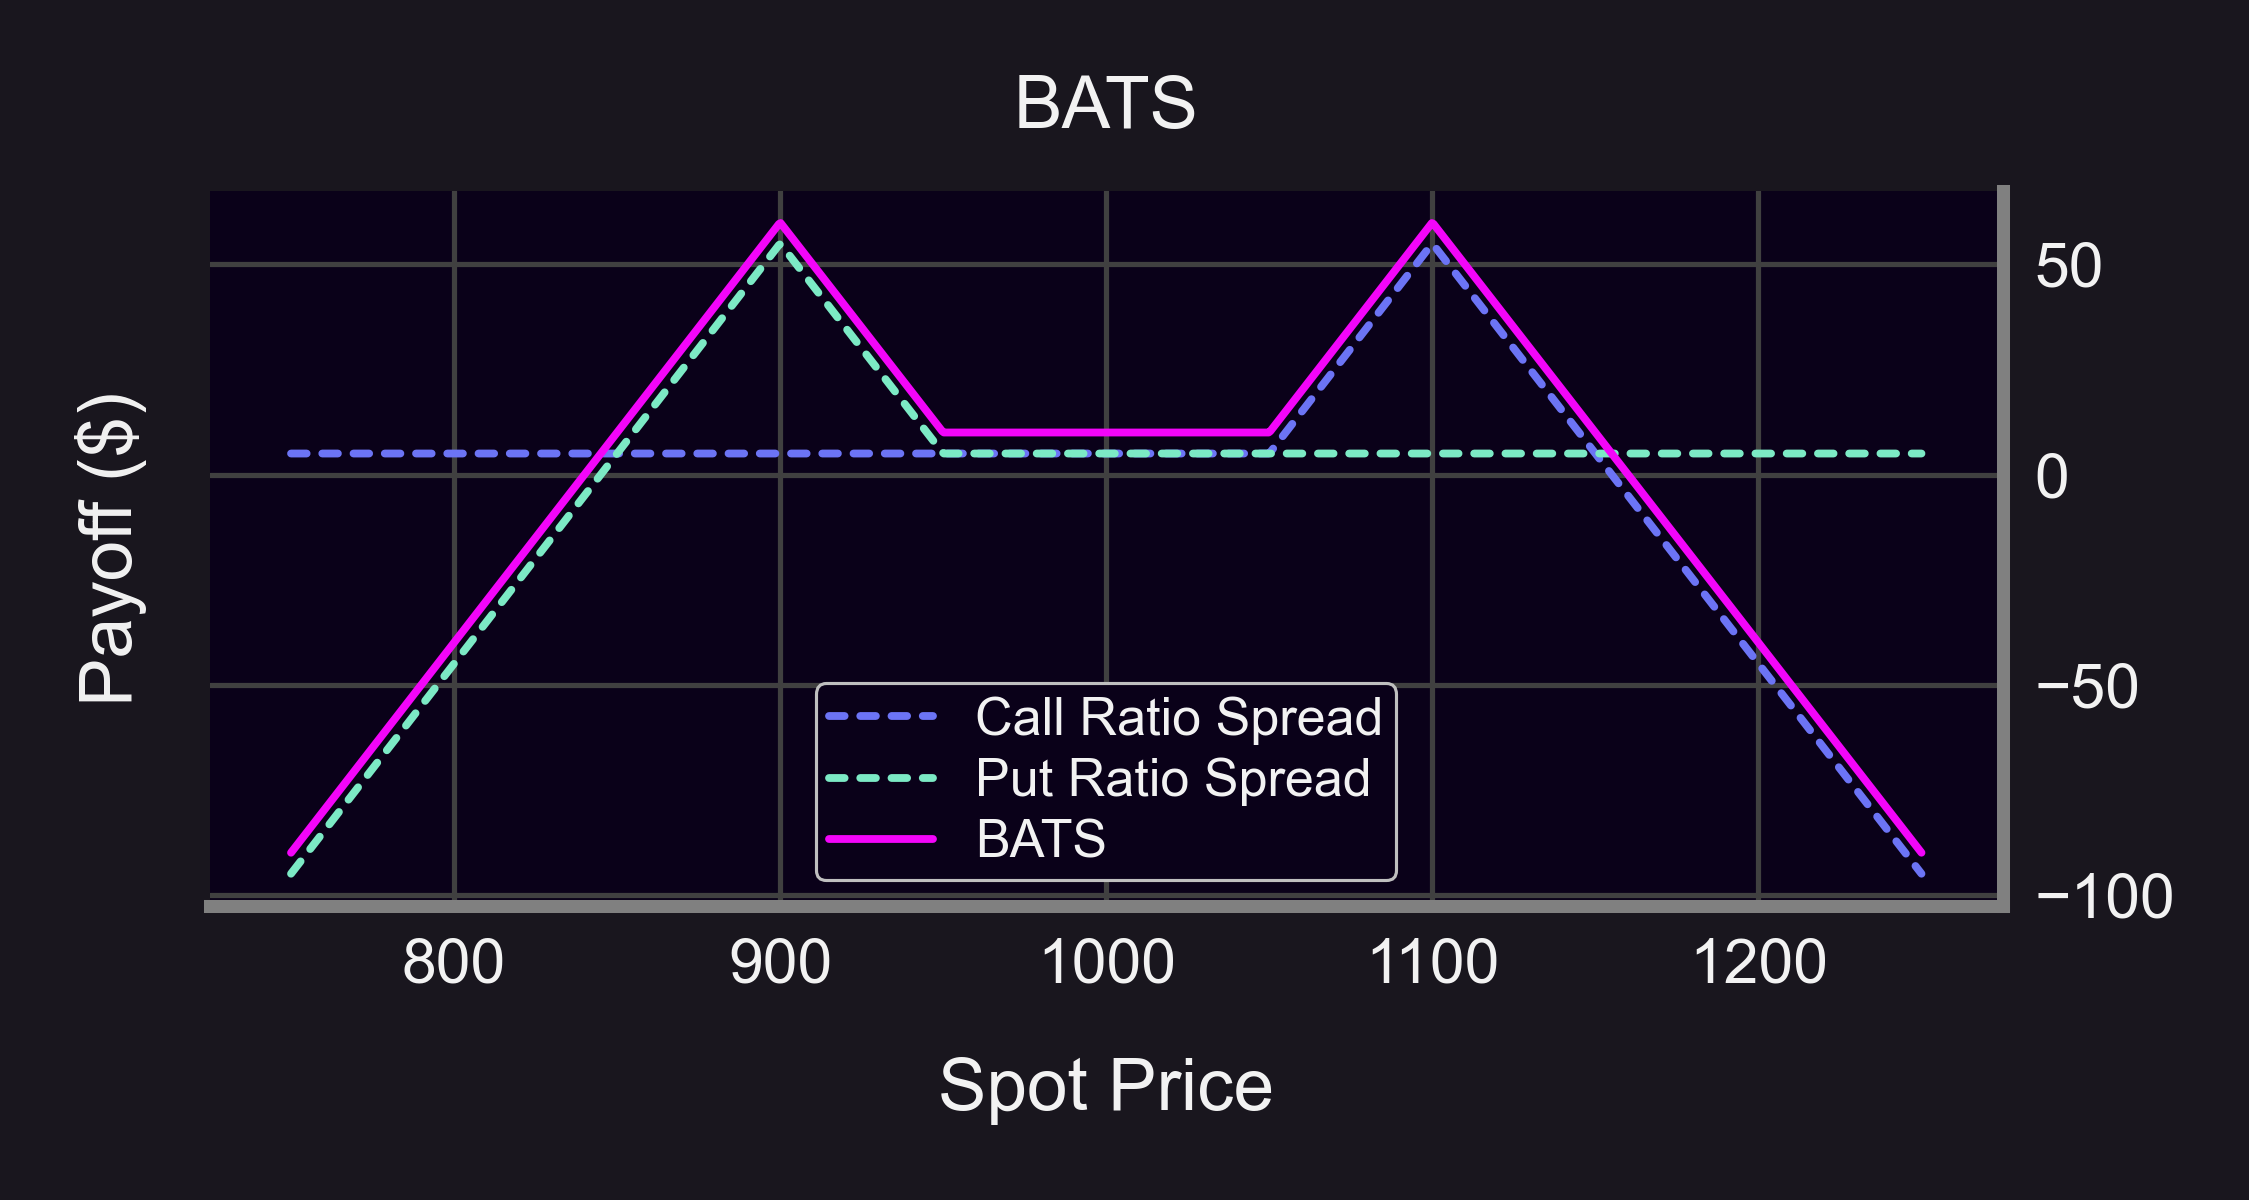

In [243]:
# BATS = Call ratio spread + put ratio spread
S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# Long call (lower strike)
S_0 = 1_000
X = S_0 * 1.05
P = S_0 * 0.035
payoff_long_call = call(S, X, P)

# Short calls (higher strike)
S_0 = 1_000
X = S_0 * 1.10
P = S_0 * 0.02
payoff_short_call_2 = -2 * call(S, X, P)

call_ratio_spread = payoff_long_call + payoff_short_call_2

# Long put (higher strike)
S_0 = 1_000
X = S_0 * 0.95
P = S_0 * 0.035
payoff_long_put = put(S, X, P)

# Short puts (lower strike)
S_0 = 1_000
X = S_0 * 0.9
P = S_0 * 0.02
payoff_short_put_2 = -2 * put(S, X, P)

put_ratio_spread = payoff_long_put + payoff_short_put_2


plot_payoffs(S, 'BATS', {'Call Ratio Spread': call_ratio_spread, 'Put Ratio Spread': put_ratio_spread})

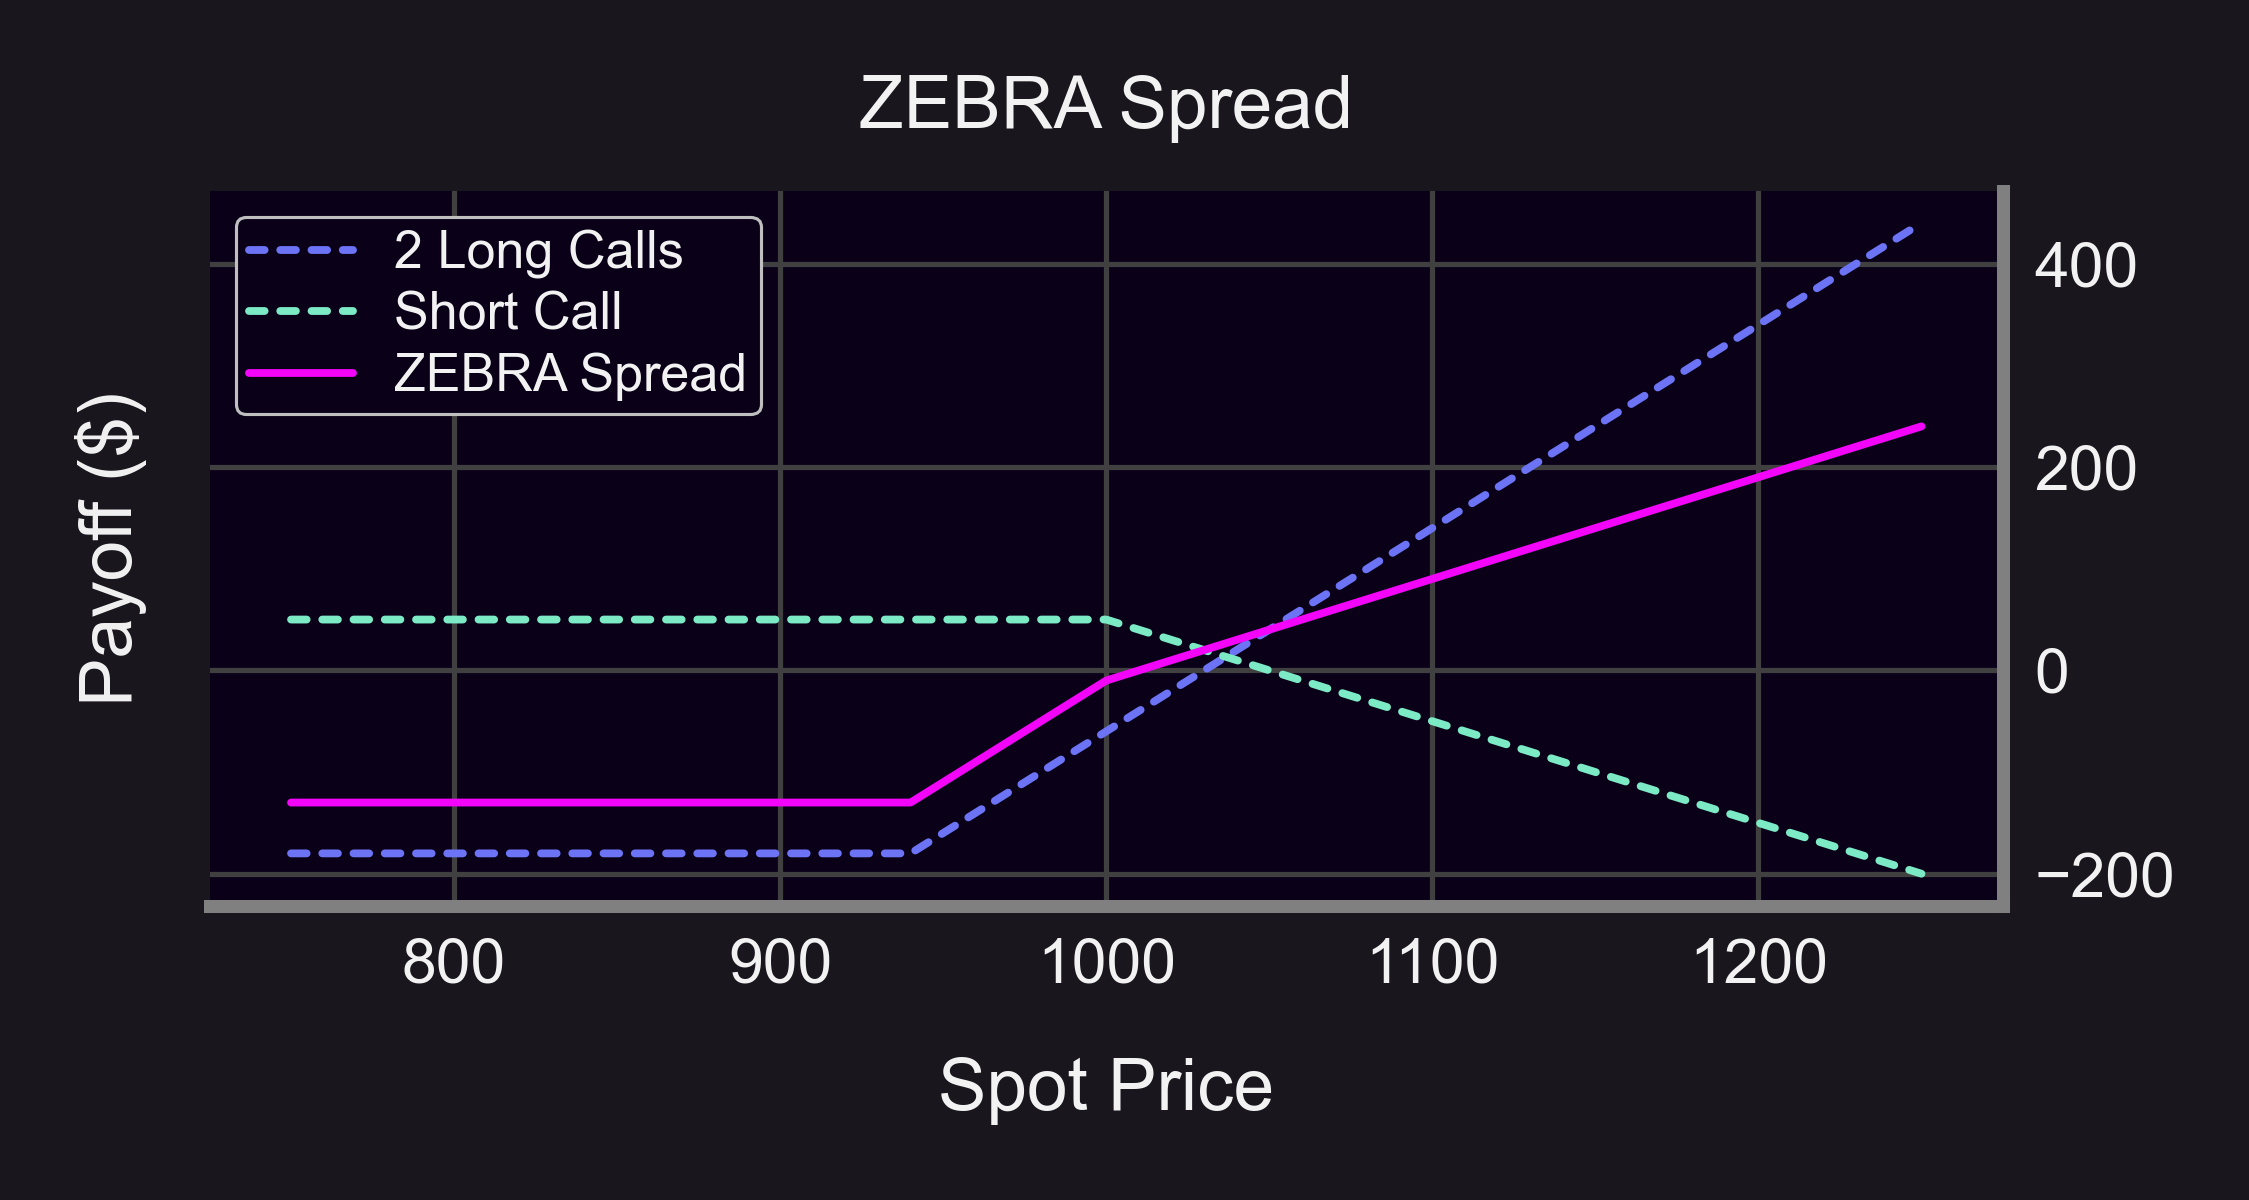

In [244]:
# ZEBRA spread = 2 ITM long calls + 1 ATM short call

S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# 2 ITM long calls
S_0 = 1_000
X = S_0 * 0.94
P = S_0 * 0.09
payoff_long_call_2 = 2 * call(S, X, P)

# 1 ATM short call
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_short_call = -call(S, X, P)

plot_payoffs(S, 'ZEBRA Spread', {'2 Long Calls': payoff_long_call_2, 'Short Call': payoff_short_call})

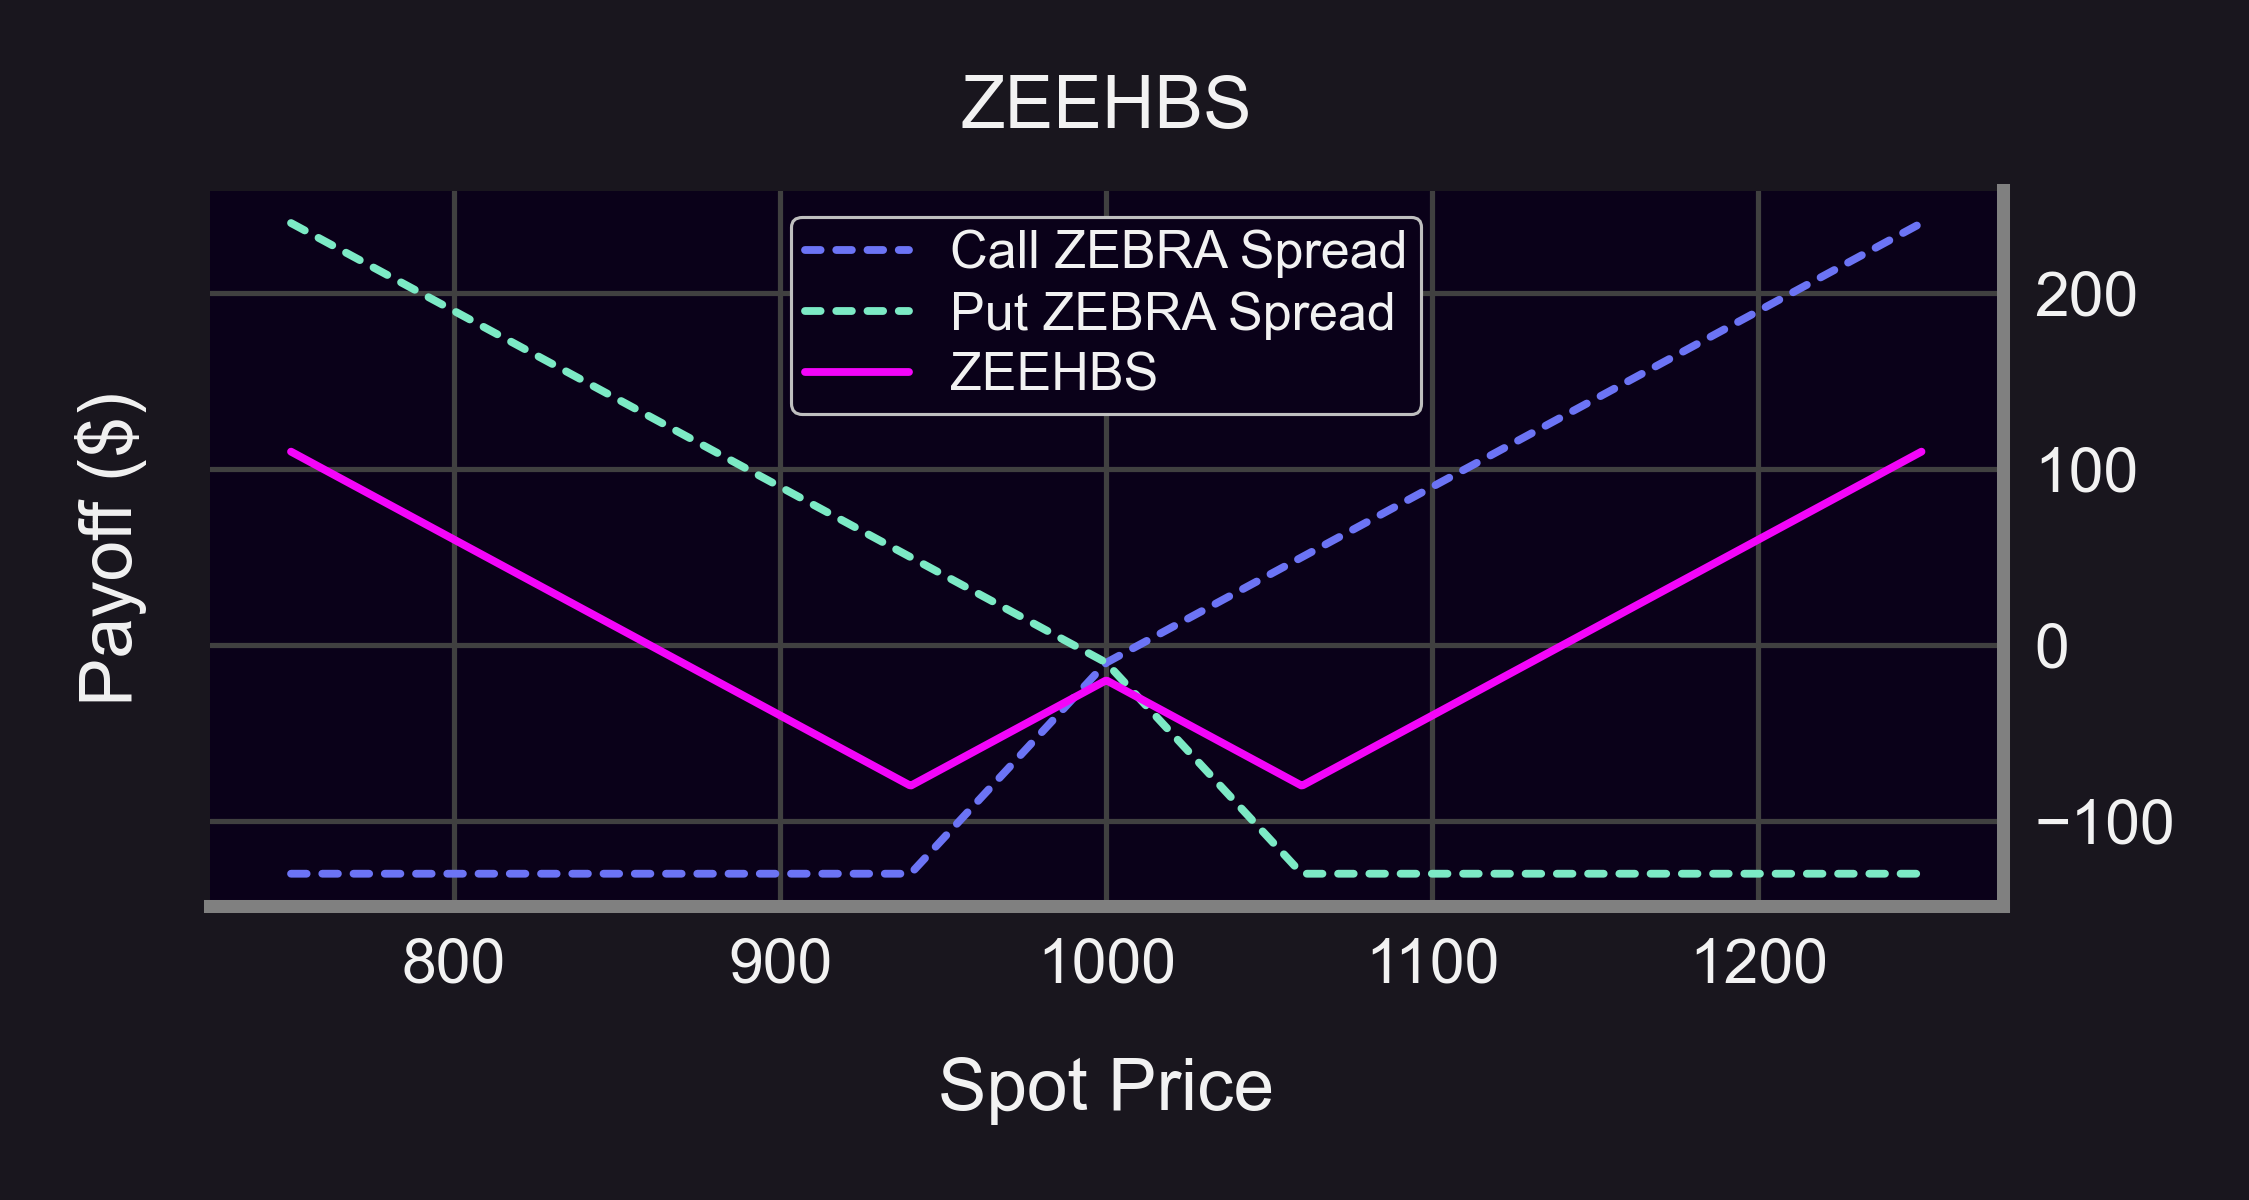

In [245]:
# ZEEHBS = Call ZEBRA spread + put ZEBRA spread

S = np.linspace(0.75 * S_0, S_0 * 1.25, 1_000)

# 2 ITM long calls
S_0 = 1_000
X = S_0 * 0.94
P = S_0 * 0.09
payoff_long_call_2 = 2 * call(S, X, P)

# 1 ATM short call
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_short_call = -call(S, X, P)

payoff_call_zebra = payoff_long_call_2 + payoff_short_call

# 2 ITM long puts
S_0 = 1_000
X = S_0 * 1.06
P = S_0 * 0.09
payoff_long_put_2 = 2 * put(S, X, P)

# 1 ATM short put
S_0 = 1_000
X = S_0
P = S_0 * 0.05
payoff_short_put = -put(S, X, P)

payoff_put_zebra = payoff_long_put_2 + payoff_short_put

plot_payoffs(S, 'ZEEHBS', {'Call ZEBRA Spread': payoff_call_zebra, 'Put ZEBRA Spread': payoff_put_zebra})